# HOUSING PROJECT :

submitted by : AMAN KUMAR PATEL

INTERNSHIP 25

# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

# Importing Libraries:

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# importing warnings to avoid warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# calling the dataset

pd.set_option('display.max.columns',None)  # to show all the columns and rows
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

here after the observation we can see the , first of all in problem statekment this is case for housing price , wew will predict here sales price in the datset.
and it is clear that my target is the sales prcr columns and the it is having only int values so, it is a problem of regression problem.

In [3]:
# calling the test data

pd.set_option("display.max.columns",None) #to show all the columns and rows
dfa = pd.read_csv("test.csv")
dfa.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

there is a requirment to merge the both dataset , but i will do it after the cleaning the dataset

# Exploratry Data Analysis: (EDA)

In [4]:
# checking the shape of train dataset

df.shape

(1168, 81)

here we are getting 1168 rows and 81 columns

In [5]:
# checking the shape of test dataset

dfa.shape

(292, 80)

here we are getting 292 rows and 80 columns

In [6]:
# checking the columns of train dataset

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

here we can see the names of columns

In [7]:
# checking the columns of test dataset

dfa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

here we can see the names of test dataset

In [8]:
# Checking the types of train dataset columns 

df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

here we can see the all types of dataset aRE Present in the following train dataset 

In [9]:
# Checking the types of test dataset columns 

dfa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

Here we can see the types of test dataset is containing so three types of data , int , str ,and float also 


In [10]:
# checking the all inforation of Train datset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

in this dataset , we can see the all info of train dataset like only 3 columns have float values and the 35 columns has int value and the 43 columns has object values.

In [11]:
# checking the information of test dataset 

dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

in the test dataset we can se the 64 columns is having float columns and the 34 columns is having the 34 columns and the 42 columns is having the object value

In [12]:
# dropping the unnecessary columns from train dataset

df = df.drop(["Alley"],axis=1)
df = df.drop(["PoolQC"],axis=1)
df = df.drop(["Fence"],axis=1)
df = df.drop(["MiscFeature"],axis=1)

here we have droppped these columns from the train dataset , because we observed from the info , some columns is having very high null values.

In [13]:
# dropping the unnecessary columns from train dataset

dfa = dfa.drop(["Alley"],axis=1)
dfa = dfa.drop(["PoolQC"],axis=1)
dfa = dfa.drop(["Fence"],axis=1)
dfa = dfa.drop(["MiscFeature"],axis=1)

here we have droppped these columns from the test dataset , because we observed from the info , some columns is having very high null values.

In [14]:
# now let's check the unique values of train dataset

df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 77, dtype: int64

In [15]:
# now let's check the unique values of test dataset 

dfa.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
                ... 
MiscVal            8
MoSold            12
YrSold             5
SaleType           6
SaleCondition      4
Length: 76, dtype: int64

here we can see uniqueness in both dataset , in both dataset id has the whole unique values..so we will drop it from both dataset, and the In Utilities column unique value count is 1 which means all the entries are same this will not help us in model building so let me drop this column but in test dataset utilities has 2 values , but we will drop it because we have to marge both dataset.

In [16]:
# Droping unnecessary columns in train dataset

df = df.drop(["Id"],axis=1)
df = df.drop(["Utilities"],axis=1)

# Dropping unnecessary columns in test dataset 

dfa = dfa.drop(["Id"],axis=1)
dfa = dfa.drop(["Utilities"],axis=1)

In [17]:
# take a look of columns which is having any unexpected and the unwanted entries from train dataset

for j in df.columns:
    print(df[j].value_counts())
    print("-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)")

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
141.0      1
144.0      1
111.0      1
39.0       1
46.0       1
Name: LotFrontage, Length: 106, dtype: int64
-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length: 892, dtype: int64
-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
Pave    1164
Grvl       4
Name: Street, dtype: int64
-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
-)-)-)-)-)-)-)-)-)

Here we can see after the checking of train dataset that , there are not any unwanted and unexpected entries are present here but
 there are so many columns which is having zeroes more than 80 % , and we have to drop it all.
    
    BsmFinSf2
    LowQualFinSF
    EnclosedPorch
    3SsnPorch
    ScreenPorch
    Poolarea
    MiscVal

In [18]:
# taking a look for which column is having the unexpexted and unwanted entries in test dataset 

for i in dfa.columns:
        print(dfa[i].value_counts())
        print('_-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)')

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
40       1
85       1
Name: MSSubClass, dtype: int64
_-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
_-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
60.0    32
85.0    14
50.0    13
70.0    12
21.0     9
        ..
45.0     1
77.0     1
69.0     1
33.0     1
61.0     1
Name: LotFrontage, Length: 65, dtype: int64
_-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
7200      7
1680      4
9600      3
10800     3
7500      3
         ..
10998     1
6853      1
14536     1
215245    1
14720     1
Name: LotArea, Length: 249, dtype: int64
_-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
Pave    290
Grvl      2
Name: Street, dtype: int64
_-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64
_-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)-)
Lvl    265
Bn

Here we can see after the checking of test  dataset that , there are not any unwanted and unexpected entries are present here but there are so many columns which is having zeroes more than 80 % , and we have to drop it all. and we will drop same columns as the train dataset because we have to merge them

BsmFinSf2
LowQualFinSF
EnclosedPorch
3SsnPorch
ScreenPorch
Poolarea
MiscVal

In [19]:
# dropping the columns from the train dataset because it is taking so much zeroes

df = df.drop(["BsmtFinSF2"],axis=1)
df = df.drop(["LowQualFinSF"],axis=1)
df = df.drop(["EnclosedPorch"],axis=1)
df = df.drop(["3SsnPorch"],axis=1)
df = df.drop(["ScreenPorch"],axis=1)
df = df.drop(["PoolArea"],axis=1)
df = df.drop(["MiscVal"],axis=1)

# dropping the columns from the train dataset because it is taking so much zeroes

dfa = dfa.drop(["BsmtFinSF2"],axis=1)
dfa = dfa.drop(["LowQualFinSF"],axis=1)
dfa = dfa.drop(["EnclosedPorch"],axis=1)
dfa = dfa.drop(["3SsnPorch"],axis=1)
dfa = dfa.drop(["ScreenPorch"],axis=1)
dfa = dfa.drop(["PoolArea"],axis=1)
dfa = dfa.drop(["MiscVal"],axis=1)

In [20]:
# checking the null values of train dataset

df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 68, dtype: int64

Here we can see the there are lots of columns is having Null values so we will cover that with the help of Imputation method

In [21]:
# cheking the nul value of Test dataset

dfa.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
                 ..
OpenPorchSF       0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 67, dtype: int64

Here we can see the there are lots of columns which is having null values so we will cover with the help of imputation method. 

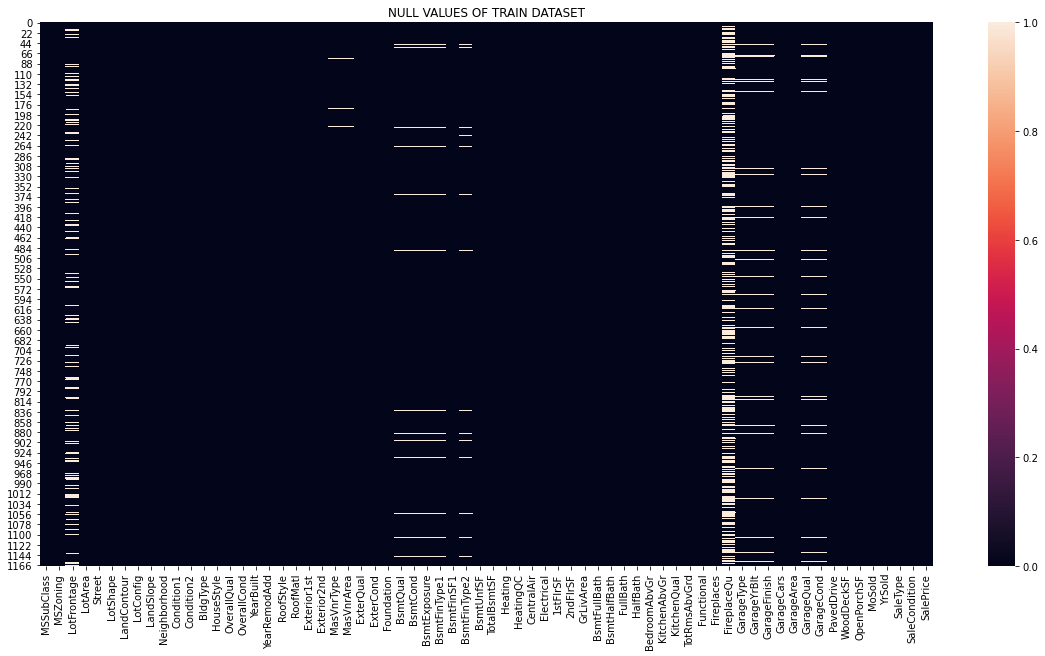

In [22]:
# Visulization of train dataset nulll values with the help of heatmap

plt.figure(figsize=[20,10])
sns.heatmap(df.isnull())
plt.title("NULL VALUES OF TRAIN DATASET")
plt.show()

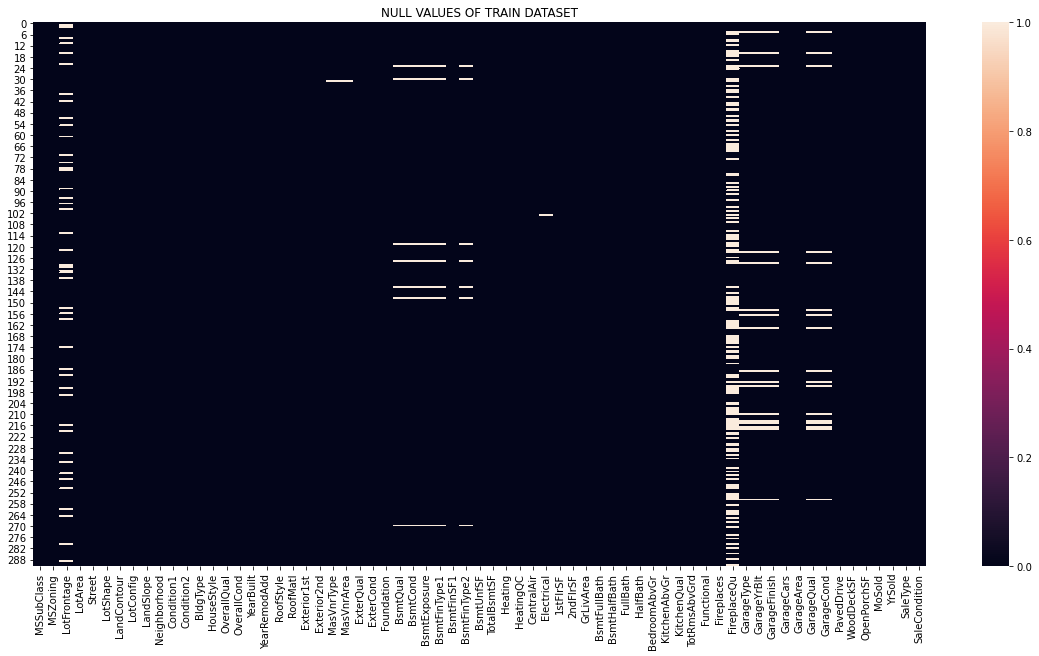

In [23]:
# visualization of test dataset Null values with the help of heatmap

# Visulization of train dataset nulll values with the help of heatmap

plt.figure(figsize=[20,10])
sns.heatmap(dfa.isnull())
plt.title("NULL VALUES OF TRAIN DATASET")
plt.show()

# IMPUTATION  METHOD:

In [24]:
# let's create a list of categorical and numerical datatypes in train dataset 

df_cat = []
df_num = []
for col in df.columns:
    if(df[col].dtype=='object'):
        df_cat.append(col)
    else:
        df_num.append(col)
        
# let"s crate a list of categorical and numerical datatypes in test dataset

dfa_cat = []
dfa_num = []
for col in dfa.columns:
    if(dfa[col].dtype=='object'):
        dfa_cat.append(col)
    else:
        dfa_num.append(col)        

In [25]:
# Replacing null values of categorical columns of train dataset

catcol = df.columns.values
for i in range(0,len(catcol)):
    if df[catcol[i]].dtype == "object":
        df[catcol[i]].fillna(df[catcol[i]].mode()[0], inplace=True)
        
# Replacing the null values of categorical columns test dataset 

catcola = dfa.columns.values
for i in range(0,len(catcola)):
    if dfa[catcola[i]].dtype == "object":
        dfa[catcola[i]].fillna(dfa[catcola[i]].mode()[0], inplace=True)

In [26]:
#Replacing null values of numerical column with mean of that column in train dataset.

numcol = df.columns.values
for i in range(0,len(numcol)):
    if df[numcol[i]].dtype != "object":
        df[numcol[i]].fillna(df[numcol[i]].mean(), inplace=True)
        
#Replacing null values of numerical column with mean of that column in test dataset.

numcola = dfa.columns.values
for i in range(0,len(numcola)):
    if dfa[numcola[i]].dtype != "object":
        dfa[numcola[i]].fillna(dfa[numcola[i]].mean(), inplace=True)        

In [27]:
# Now let's check null values again of train dataset

df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 68, dtype: int64

In [28]:
# let's check again of test dataset of test dataset

dfa.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
OpenPorchSF      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 67, dtype: int64

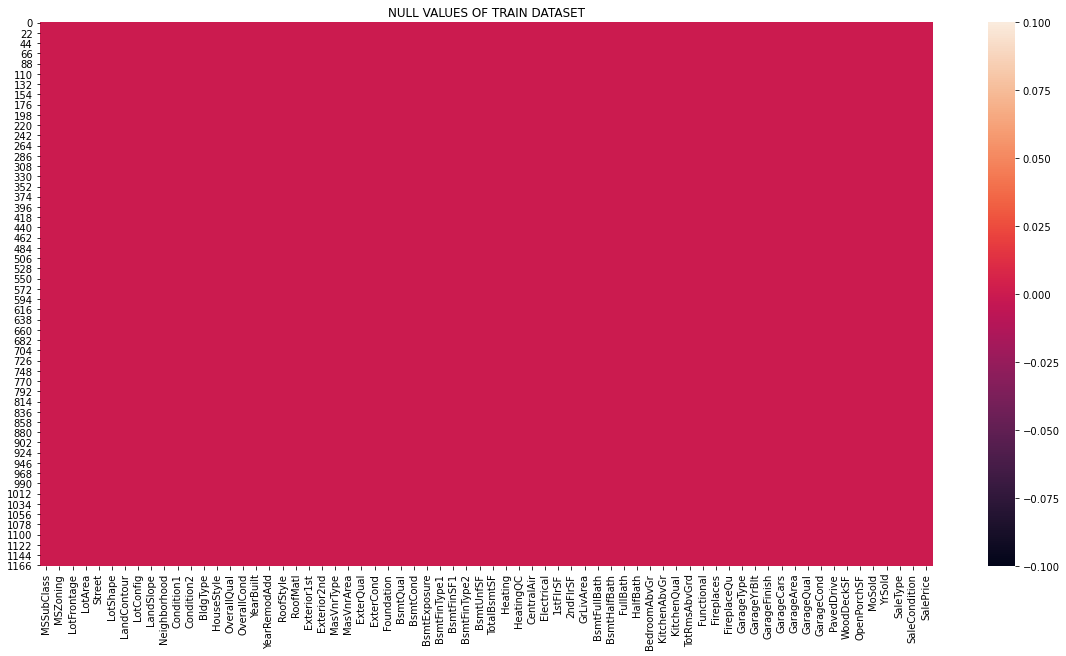

In [29]:
# REVisulization of train dataset nulll values with the help of heatmap after the removing null values

plt.figure(figsize=[20,10])
sns.heatmap(df.isnull())
plt.title("NULL VALUES OF TRAIN DATASET")
plt.show()

here we can see the now all null values is cleared

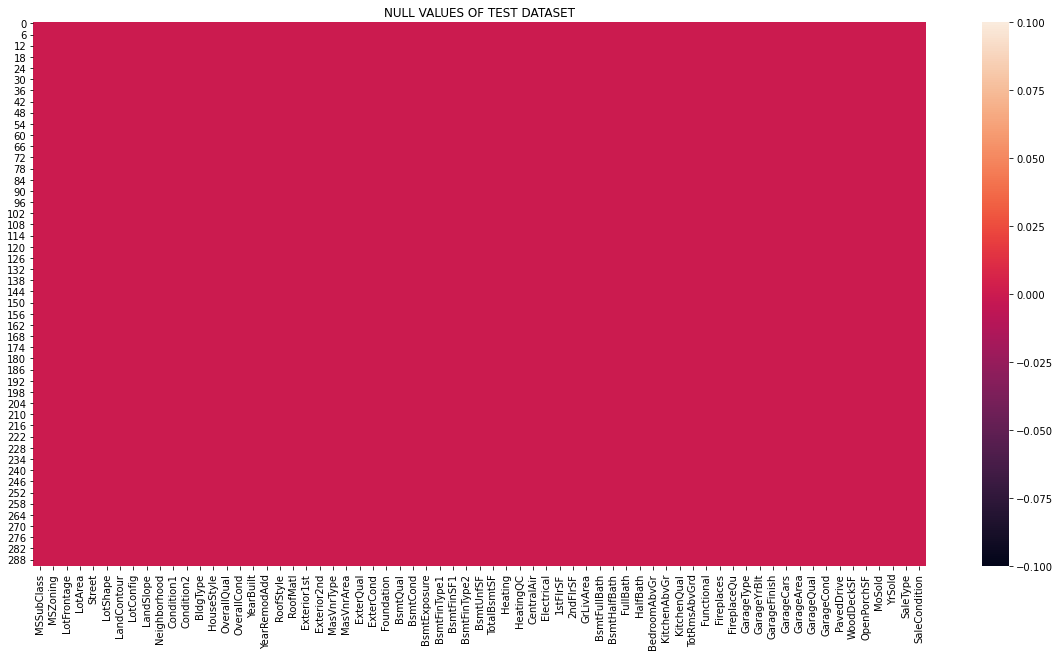

In [30]:
# REVisulization of test dataset nulll values with the help of heatmap after removing the null values

plt.figure(figsize=[20,10])
sns.heatmap(dfa.isnull())
plt.title("NULL VALUES OF TEST DATASET")
plt.show()

# Feature Extraction :

In [31]:
# Converting years column to age column in train dataset

df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_SinceSold'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [32]:
# Dropping old columns in train dataset

df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [33]:
# Converting years column to age column in test dataset

dfa['Year_SinceBuilt'] = dfa['YearBuilt'].max() - dfa['YearBuilt']
dfa['Year_SinceRemodAdded'] = dfa['YearRemodAdd'].max() - dfa['YearRemodAdd']
dfa['Year_SinceSold'] = dfa['YrSold'].max() - dfa['YrSold']
dfa['GarageAge'] = dfa['GarageYrBlt'].max() - dfa['GarageYrBlt']

In [34]:
# Dropping old columns in test dataset

dfa.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [35]:
#Checking description of data set in train dataset

df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445   
std     182.047152   462.664785   449.375525   442.272249   391.161983   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   216.000000   799.000000   892.000000   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean    348.826199  1525.066781      0.425514      0.055651     1.562500   
std     439.696370   528.042957      0.521615      0.236699     0.551882   
min       0.000000   334.000000      0.000000      0.000000     0.000000   
25%       0.000000  1143.250000      0.000000      0.000000     1.000000   
50%       0.000000  1468.500000      0.000000      0.000000     2.000000   
75%     729.000000  1795.000000      1.000000      0.000000     2.000000   
max    2065.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

           SalePrice  Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  \
count    1168.000000      1168.000000           1168.000000     1168.000000   
mean   181477.005993        39.069349             25.241438        2.195205   
std     79105.586863        30.145255             20.785185        1.329738   
min     34900.000000         0.000000              0.000000        0.000000   
25%    130375.000000        10.000000              6.000000        1.000000   
50%    163995.000000        38.000000             17.000000        2.000000   
75%    215000.000000        56.000000             44.0000

In [36]:
#Checking description of data set in test  dataset
dfa.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781   
std     174.729023   429.559675   411.043768   424.561153   366.941919   
min       0.000000     0.000000     0.000000     0.000000   372.000000   
25%       0.000000     0.000000   255.000000   771.750000   858.000000   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count   292.000000   292.000000    292.000000    292.000000  292.000000   
mean    339.657534  1477.051370      0.424658      0.065068    1.575342   
std     424.278825   514.199429      0.508831      0.247070    0.547856   
min       0.000000   520.000000      0.000000      0.000000    0.000000   
25%       0.000000  1061.500000      0.000000      0.000000    1.000000   
50%       0.000000  1440.000000      0.000000      0.000000    2.000000   
75%     717.000000  1720.250000      1.000000      0.000000    2.000000   
max    1589.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF      MoSold  \
count  292.000000   292.000000  292.000000   292.000000  292.000000   
mean     1.729452   457.458904   86.397260    47.061644    6.232877   
std      0.754430   210.785591  121.898836    65.865449    2.774556   
min      0.000000     0.000000    0.000000     0.000000    1.000000   
25%      1.000000   300.000000    0.000000     0.000000    4.000000   
50%      2.000000   467.500000    0.000000    28.500000    6.000000   
75%      2.000000   569.750000  149.250000    66.000000    8.000000   
max      4.000000  1052.000000  728.000000   418.000000   12.000000   

       Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold   GarageAge  
count       292.000000            292.000000      292.000000  292.000000  
mean         36.383562             24.705479        2.140411   30.240000  
std          30.447016             20.105792        1.322867   23.161183  
min           0.000000              0.000000        0.000000    0.000000  
25%           8.000000              6.750000        1.000000    8.000000  
50%          33.000000             16.000000        2.000000   30.240000  
75%          55.000000             42.000000        3.000000   45.000000  
max         137.000000             60.000000        4.000000   94.000000

# UNIVARIATE ANALYSIS:

In [37]:
# let's check for the categorical columns of train dataset

cat_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_columns.append(i)
print(cat_columns)        

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


here we can se the categorical columns of train dataset

In [38]:
# let's check for numerical columns of train dataset

num_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_columns.append(i)
print(num_columns)        

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


here we can see the numerical columns of train dataset

In [39]:
# let's check for categorical columns of test dataset

cat_columnsa = []
for i in dfa.dtypes.index:
    if dfa.dtypes[i]=='object':
        cat_columnsa.append(i)
print(cat_columnsa)        

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


here we can see the categorical columns of test dataset

In [40]:
# let's check for numerical columns of test dataset

num_columnsa = []
for i in dfa.dtypes.index:
    if dfa.dtypes[i]!='object':
        num_columnsa.append(i)
print(num_columnsa)  

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


here we can see the numerical columns of test dataset

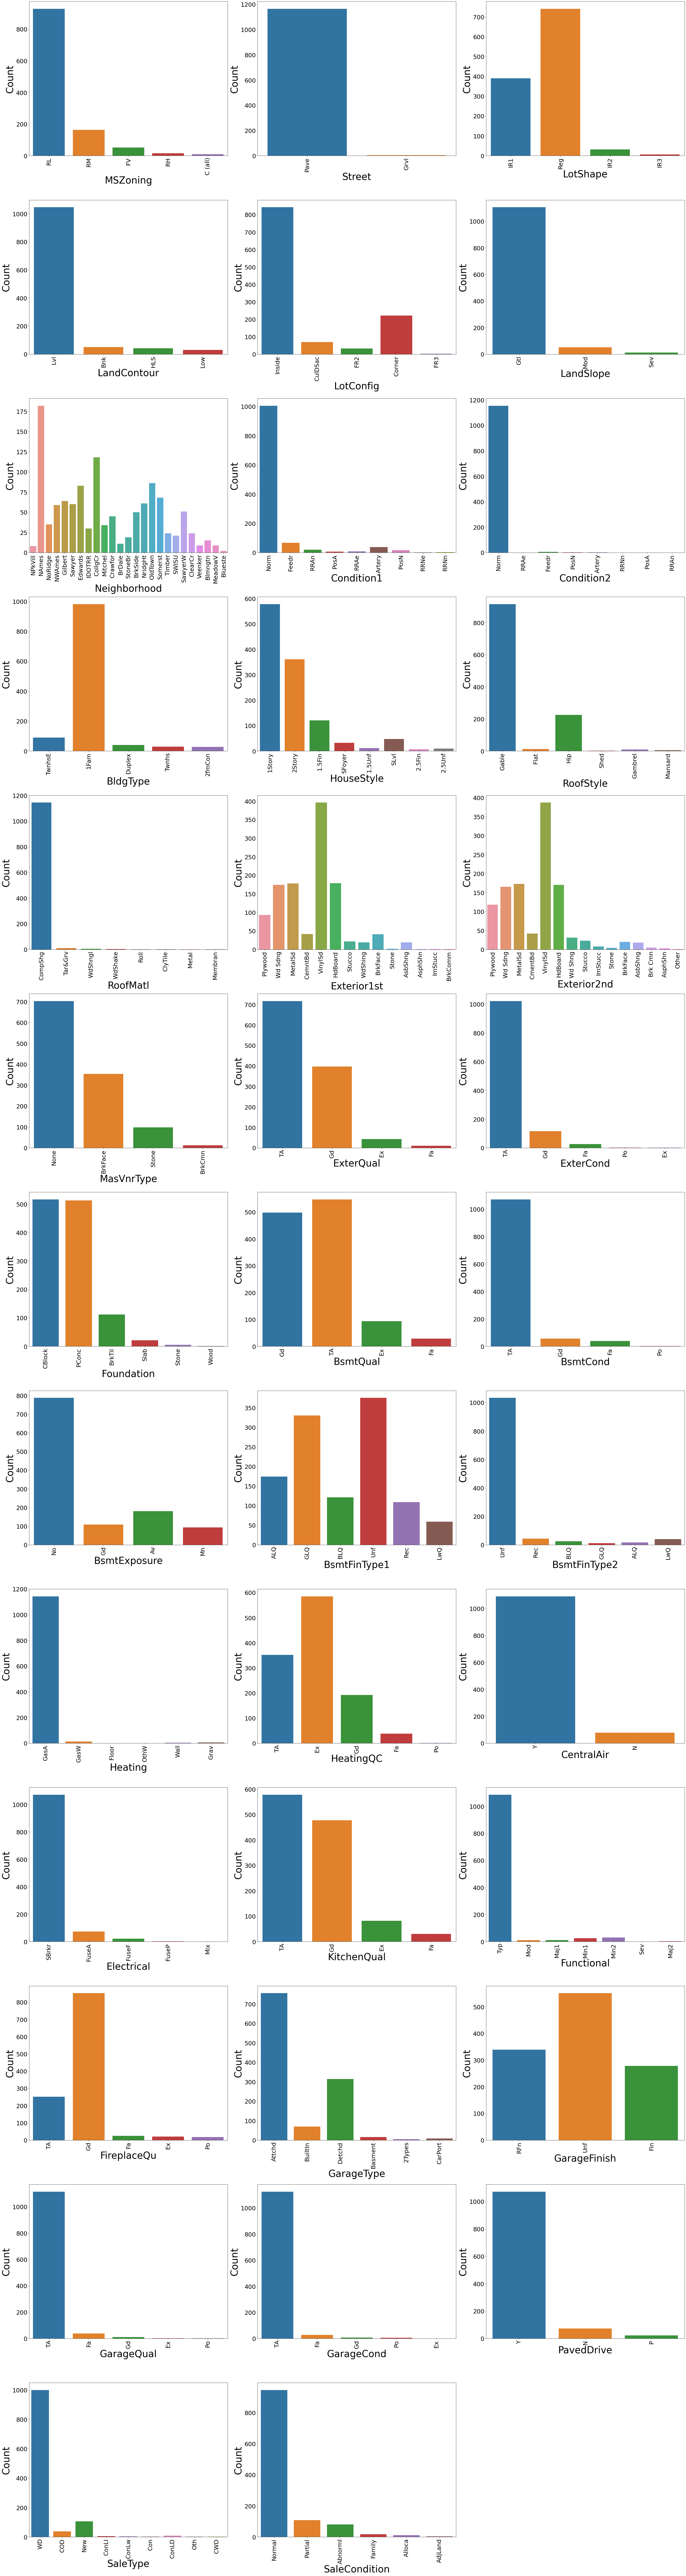

In [41]:
#Bar plot for all categorical columns

plt.figure(figsize = (40,150))
plotnumber = 1
for column in df[cat_columns]:
    if plotnumber <=40:
        ax = plt.subplot(13,3,plotnumber)
        sns.countplot(df[column])
        plt.xticks(rotation=90,fontsize = 25)
        plt.yticks(rotation=0,fontsize = 25)
        plt.xlabel(column,fontsize = 40)
        plt.ylabel('Count',fontsize = 40)
    plotnumber+=1
plt.tight_layout()

It is found that Residential Low Density zoning has maximum count, for the feature general zoning classification of the sale(MSZoning).
In Paved streets we can observe maximum count, for the feature Type of road access to property(Street).
Regular shaped property has maximum count, for the feature General shape of property(LotShape).
Near Flat/Level property has maximum count, for the feature Flatness of the property(LandContour).
Inside lot configured property has maximum count, for the feature Lot configuration(LotConfig).
Gentle sloped property has maximum count, for the feature Slope of property(LandSlope).
If the property is located in North Ames then count is good compared to other locations, for the feature Physical locations within Ames city limits(Neighborhood).
If the Proximity to various conditions-1 is normal then count is high for the feature Proximity to various conditions(Condition1).
If the Proximity to various conditions-2 is normal then count is high for the feature Proximity to various conditions (if more than one is present)(Condition2).
Single-family Detached dwelling has maximum count for the feature Type of dwelling(BldgType).
One story dwelling housestyle has maximum count for the feature Style of dwelling(HouseStyle).
For Gable roof style the count is high for the feature Type of roof(RoofStyle).
For Standard (Composite) Shingle roof material the count is high for the feature Roof material(RoofMatl).
For Vinyl Siding exterior-1 covering on house has maximum counts for the feature Exterior covering on house(Exterior1st).
For Vinyl Siding exterior-2 covering on house has maximum counts for the feature Exterior covering on house (if more than one material)(Exterior2nd).
For Masonry veneer type(MasVnrType) None has maximum count.
17.For Typical/Average(TA) quality of the material on the exterior has maximum count, for the feature Evaluates the quality of the material on the exterior (ExterQual).
For Typical/Average(TA) condition of the material on the exterior has maximum count for the feature Evaluates the present condition of the material on the exterior(ExterCond).
For Cinder Block and Poured Contrete foundations the count is maximum for the feature Type of foundation(Foundation).
For good and average quality heights of the basement the count is high for the feature Evaluates the height of the basement(BsmtQual).
For Typical/Average(TA) general condition of the basement the count is high for the feature Evaluates the general condition of the basement(BsmtCond)
For No Exposure garden level walls the count is maximum for the feature Refers to walkout or garden level walls(BsmtExposure).
For unfinished Rating of basement finished area-1 the count is maximum for the feature Rating of basement finished area(BsmtFinType1).
For unfinished Rating of basement finished area-2 the count is maximum for the feature Rating of basement finished area (if multiple types)(BsmtFinType2).
For Gas forced warm air furnace type of heating the count is maximum for the feature Type of heating(Heating).
For Excellent Heating quality and condition the count is high for the feature Heating quality and condition(HeatingQC).
For Central air conditioning-yes has maximum count for the feature Central air conditioning(CentralAir).
For Standard Circuit Breakers & Romex Electrical system the count is high for the feature Electrical system(Electrical).
For Typical/Average(TA) and good Kitchen quality the count is maximum for the feature Kitchen quality(KitchenQual).
Typical Functionality has highest count for Home functionality (Assume typical unless deductions are warranted)(Functional).
For good Fireplace quality the count is high for the feature Fireplace quality(FireplaceQu).
If Garage location Attached to home then the count is high, for the feature Garage location(GarageType).
For Unfinished Interior of the garage the count is maximum, for the feature Interior finish of the garage(GarageFinish).
For Typical/Average(TA) Garage quality the count is high, for the feature Garage quality(GarageQual).
For Typical/Average(TA) Garage condition the count is high, for the feature Garage condition(GarageCond).
For Paved driveway the count is maximum, for the feature Paved driveway(PavedDrive).
For Warranty Deed - Conventional type of sales the count is maximum, for the feature Type of sale(SaleType).
For Normal sales condition the count is high, for the feature Condition of sale(SaleCondition).

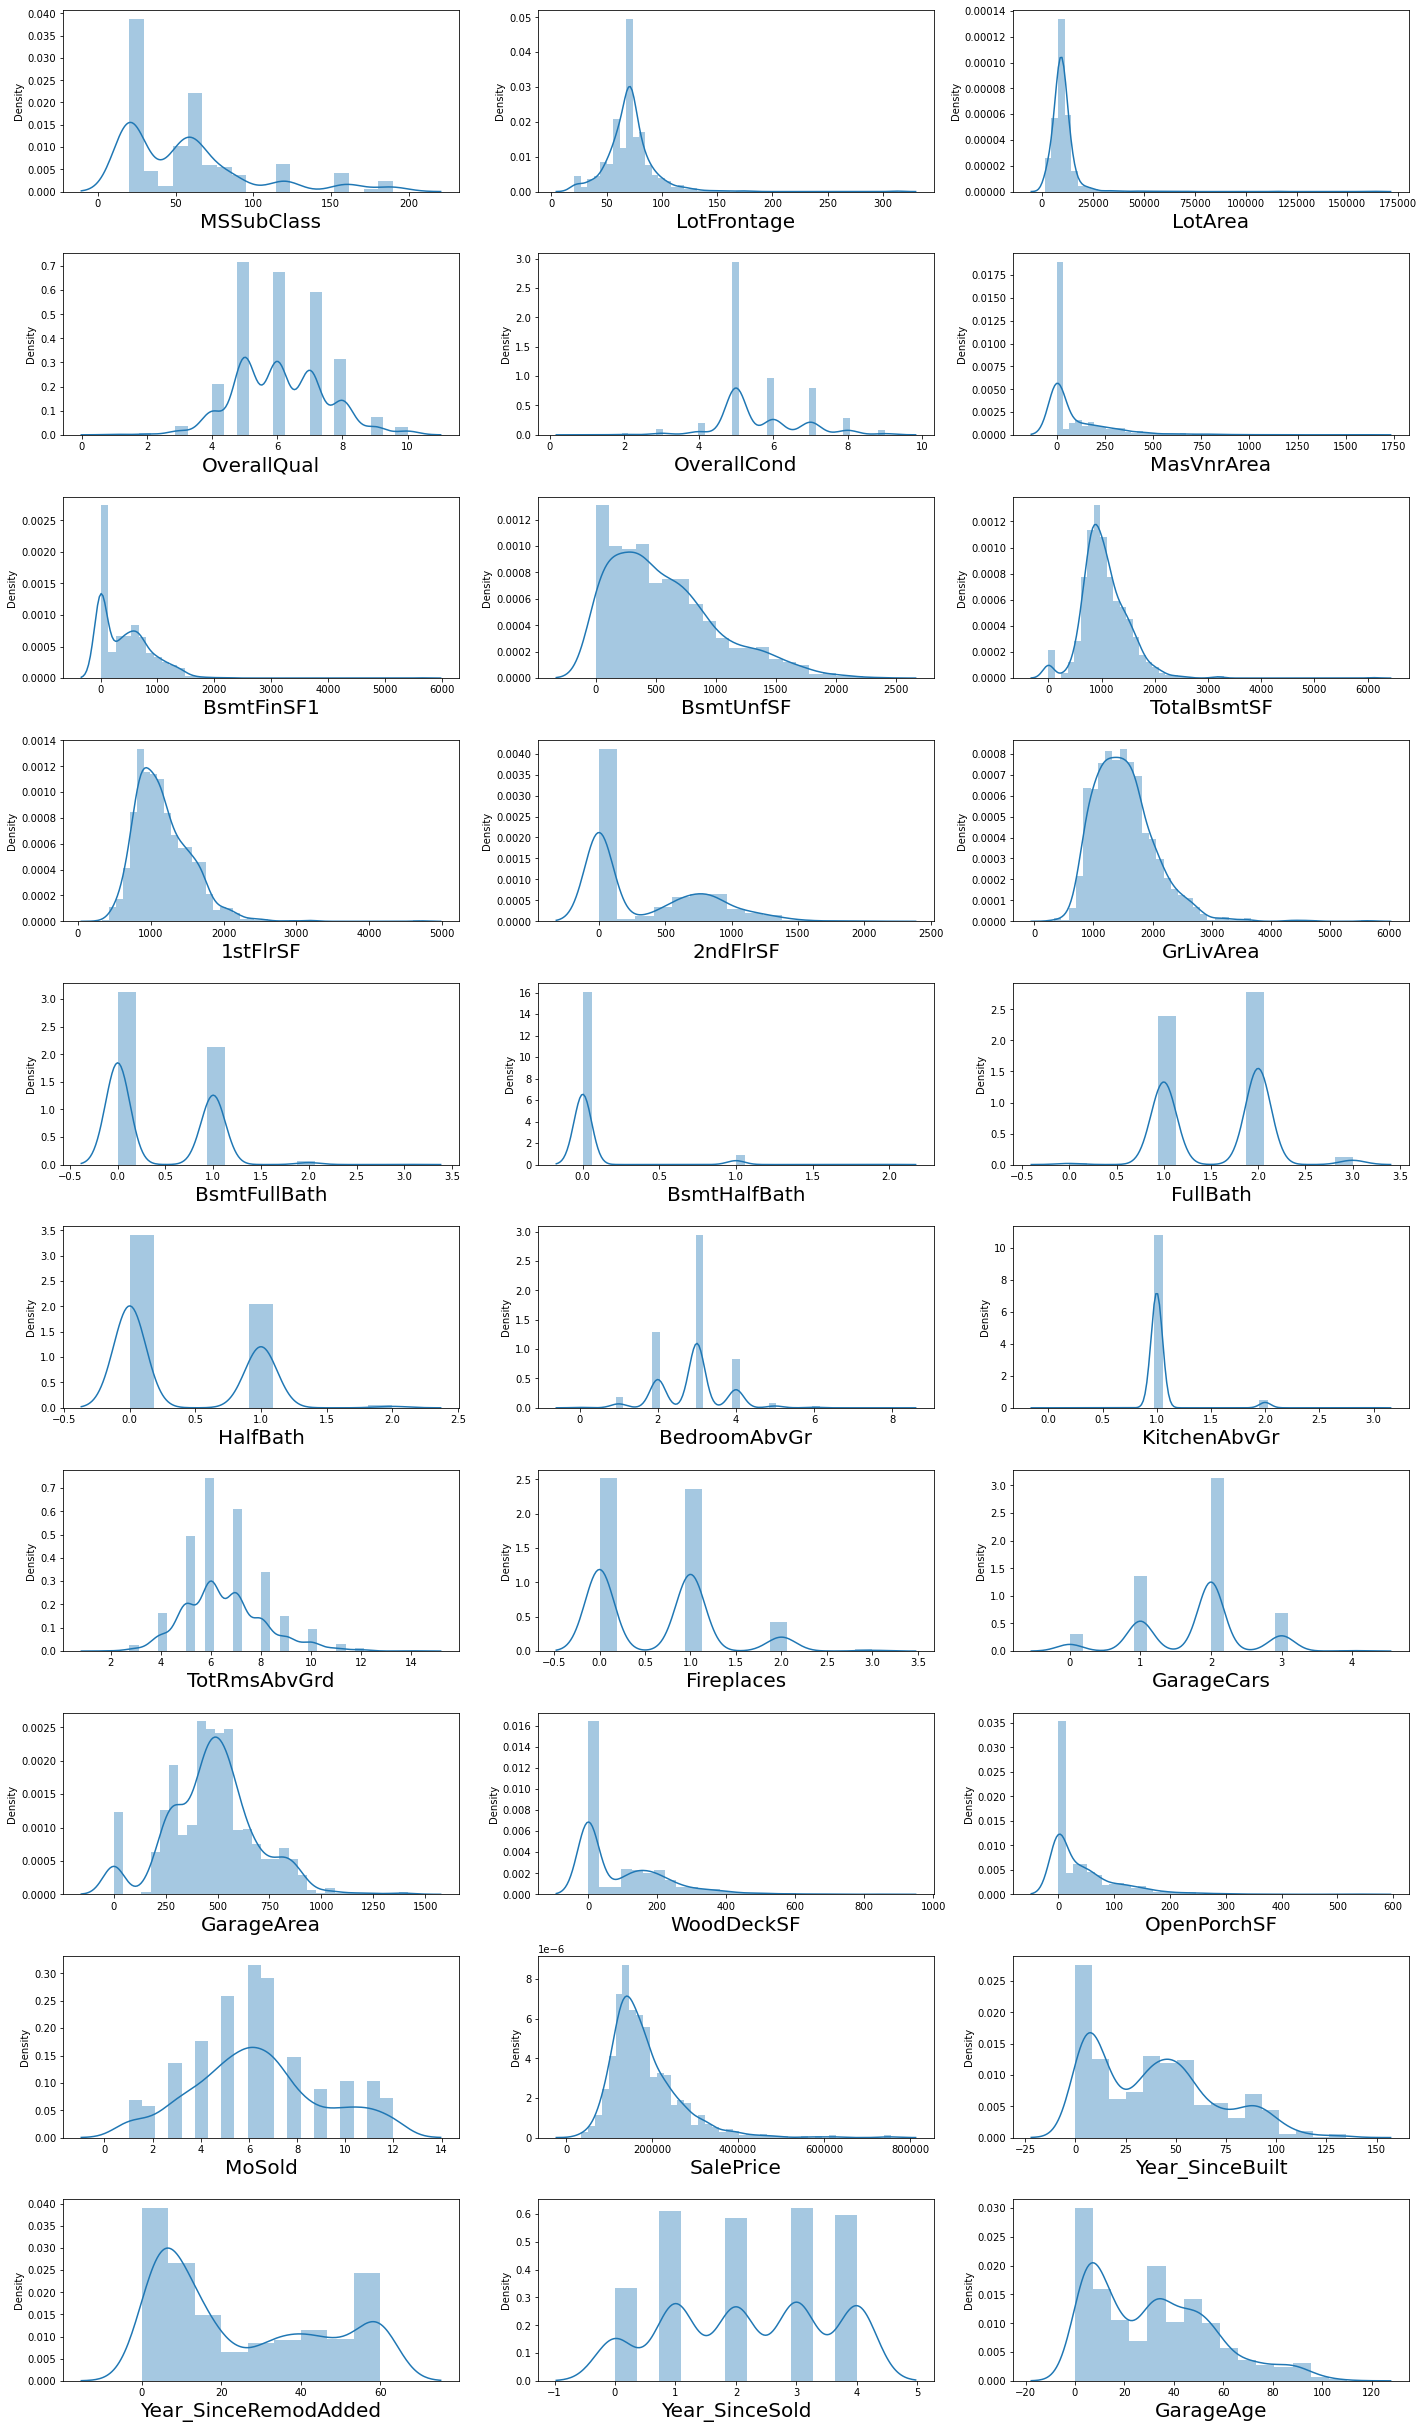

In [42]:
#DISTRIBUTION PLOTS FOR ALL NUMERICAL COLUMNS:

plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[num_columns]:
    if plotnumber <=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [44]:
col = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']

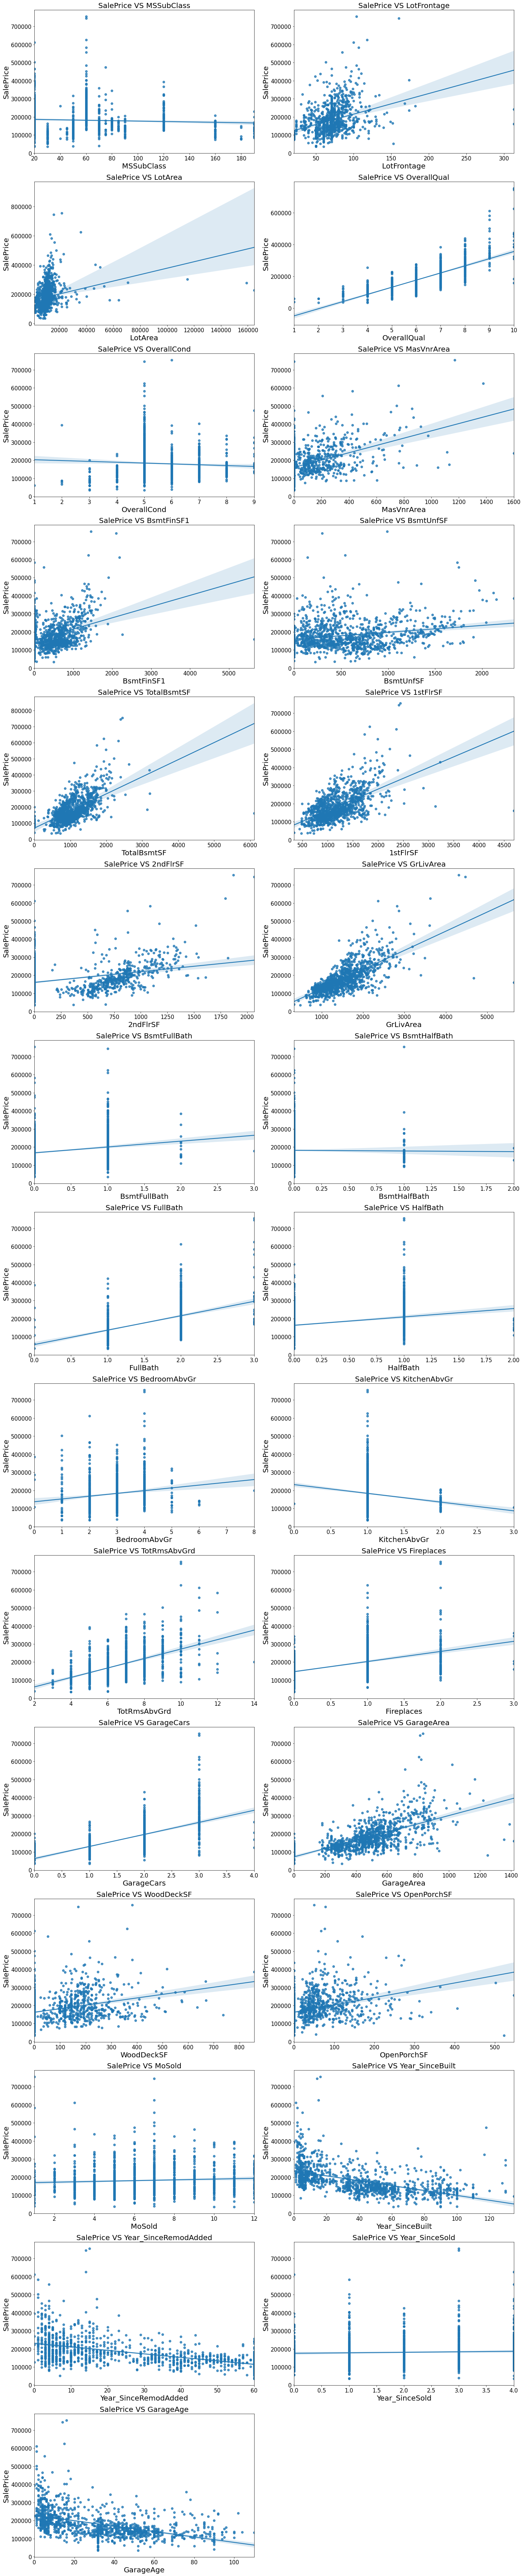

In [45]:
#regplot for numerical columns

plt.figure(figsize=(20,130))
for i in range(len(col)):
    plt.subplot(20,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['SalePrice'])
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

1.As Linear feet of street connected to property(LotFrontage) is increseing sales is decreasing and the SalePrice is rangeing between 0-3 lakhs.

2.As Lot size in square feet(LotArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

3.As Masonry veneer area in square feet(MasVnrArea) is increasing sales is decreasing and saleprice is rangeing between 0-4 lakhs.

4.As Type 1 finished square feet(BsmtFinSF1) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

5.As Unfinished square feet of basement area(BsmtUnfSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs. There are some outliers also.

6.As Total square feet of basement area(TotalBsmtSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

7.As First Floor square feet(1stFlrSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

8.As Second floor square feet(2ndFlrSF) is increseing sales is increasing in the range 500-1000 and the saleprice is in between 0-4 lakhs.

9.As Above grade (ground) living area square feet(GrLivArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

10.As Size of garage in square feet(GarageArea) is increseing sales is increseing and the saleprice is in between 0-4 lakhs.

11.As Wood deck area in square feet(WoodDeckSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

12.As Open porch area in square feet(OpenPorchSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

13.As Year_SinceBuilt is increseing sales is decreasing and the saleprice is high for newly built building and the sales price is in between 0-4 lakhs.

14.As Since Remodel date (same as construction date if no remodeling or additions)(Year_SinceRemodAdded) is increseing sales is decreasing and the saleprice is in between 1-4 lakhs.

15.As Since Year garage was built(GarageAge) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

# Checking for outliers :

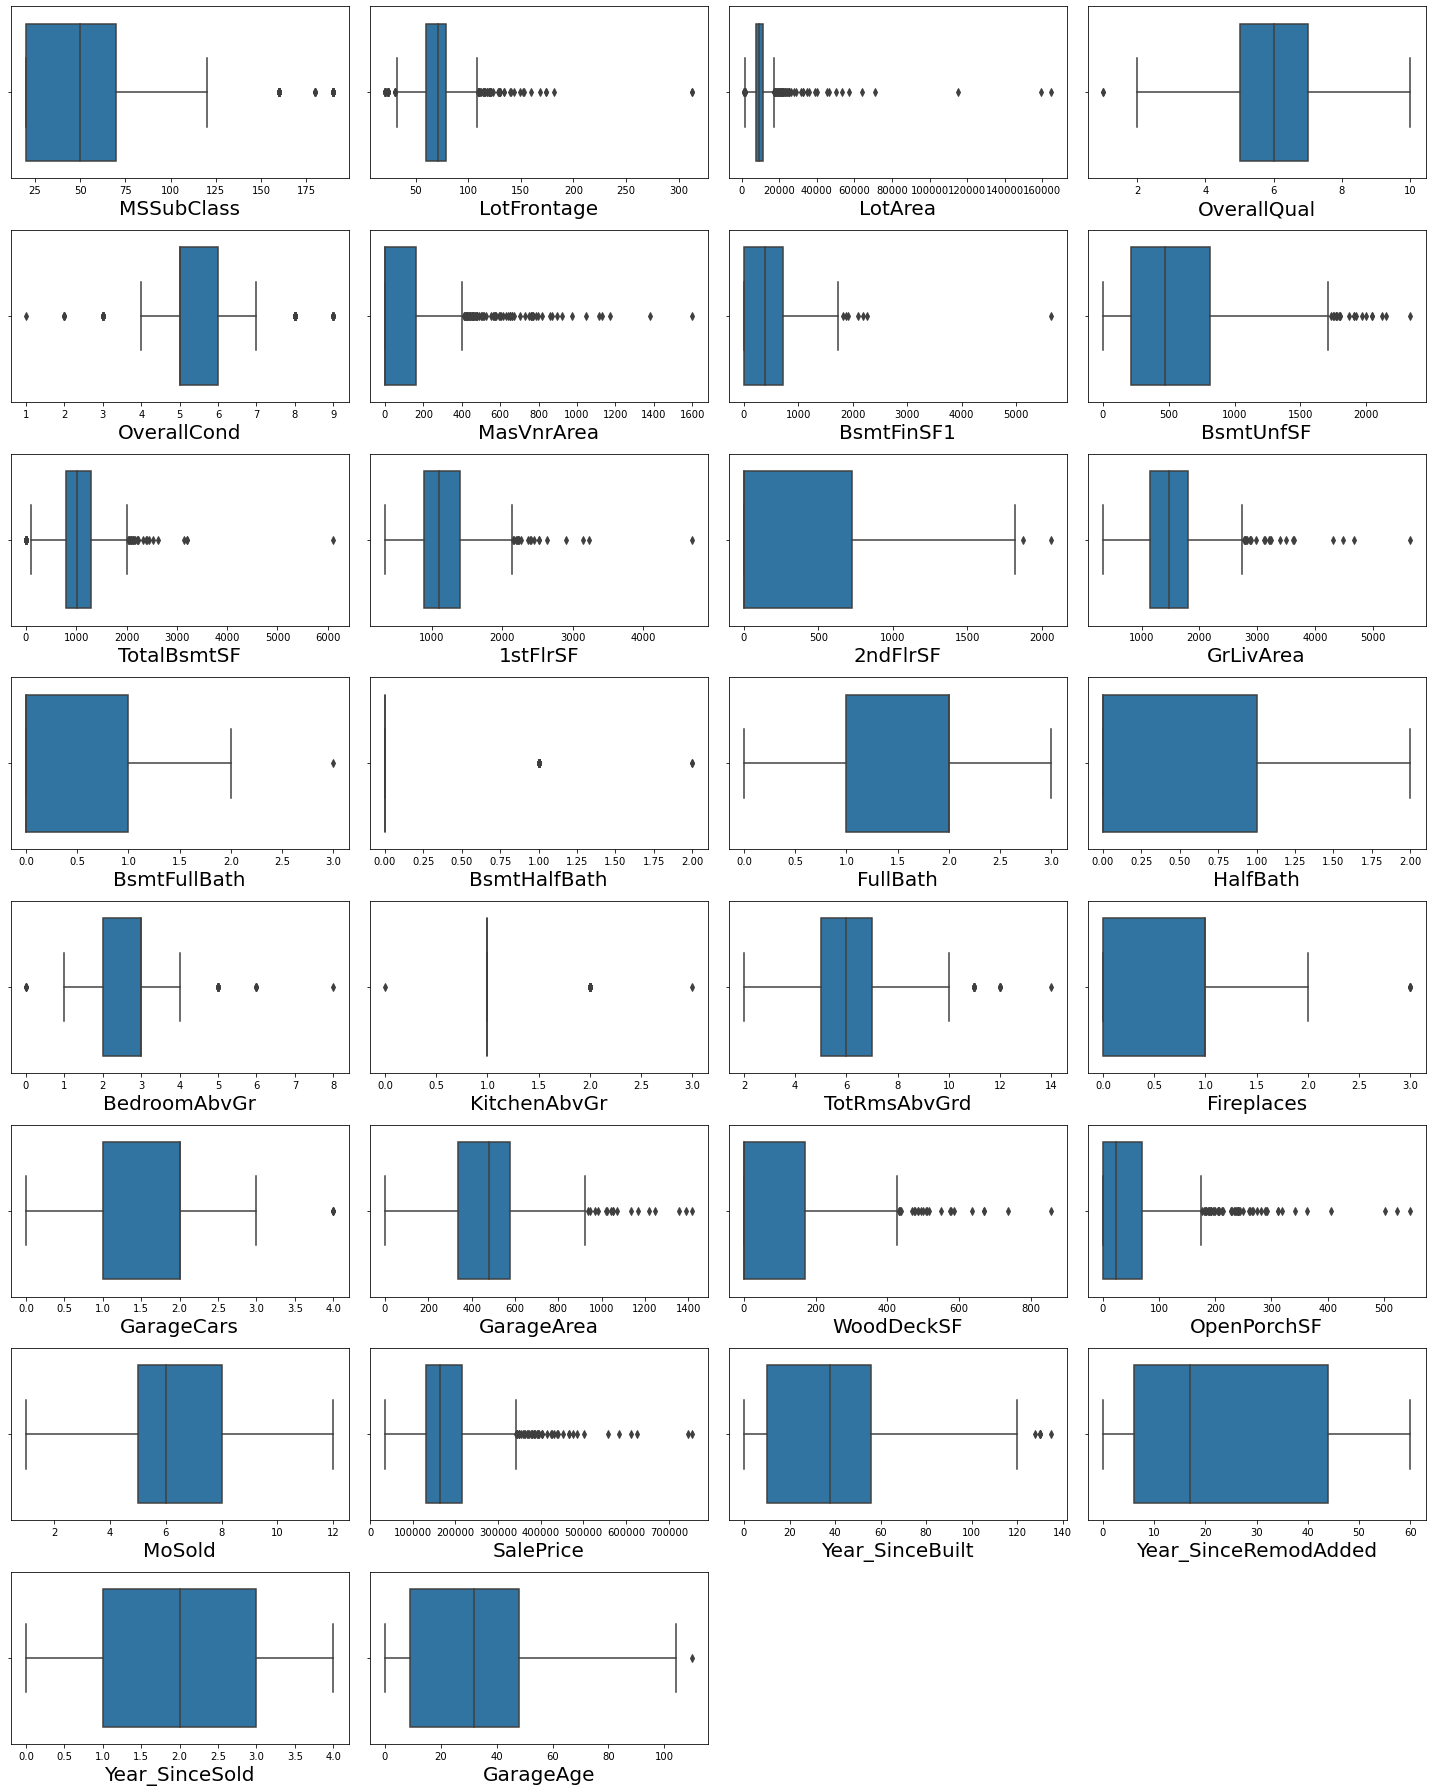

In [46]:
# Identifying the outliers using boxplot in train dataset

plt.figure(figsize=(20,25))
plotnumber=1
for column in num_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The columns with outliers in train dataset are

MSSubClass
,LotFrontage
,LotArea
,OverallQual
,OverallCond
,MasVnrArea
,BsmtFinSF1
,BsmtUnfSF
,TotalBsmtSF
,1stFlrSF
,2ndFlrSF
,GrLivArea
,BsmtFullBath
,BsmtHalfBath
,BedroomAbvGr
,KitchenAbvGr
,TotRmsAbvGrd
,Fireplaces
,GarageCars
,GarageArea
,WoodDeckSF
,OpenPorchSF
,Year_SinceBuilt
,GarageAge
,salePrice

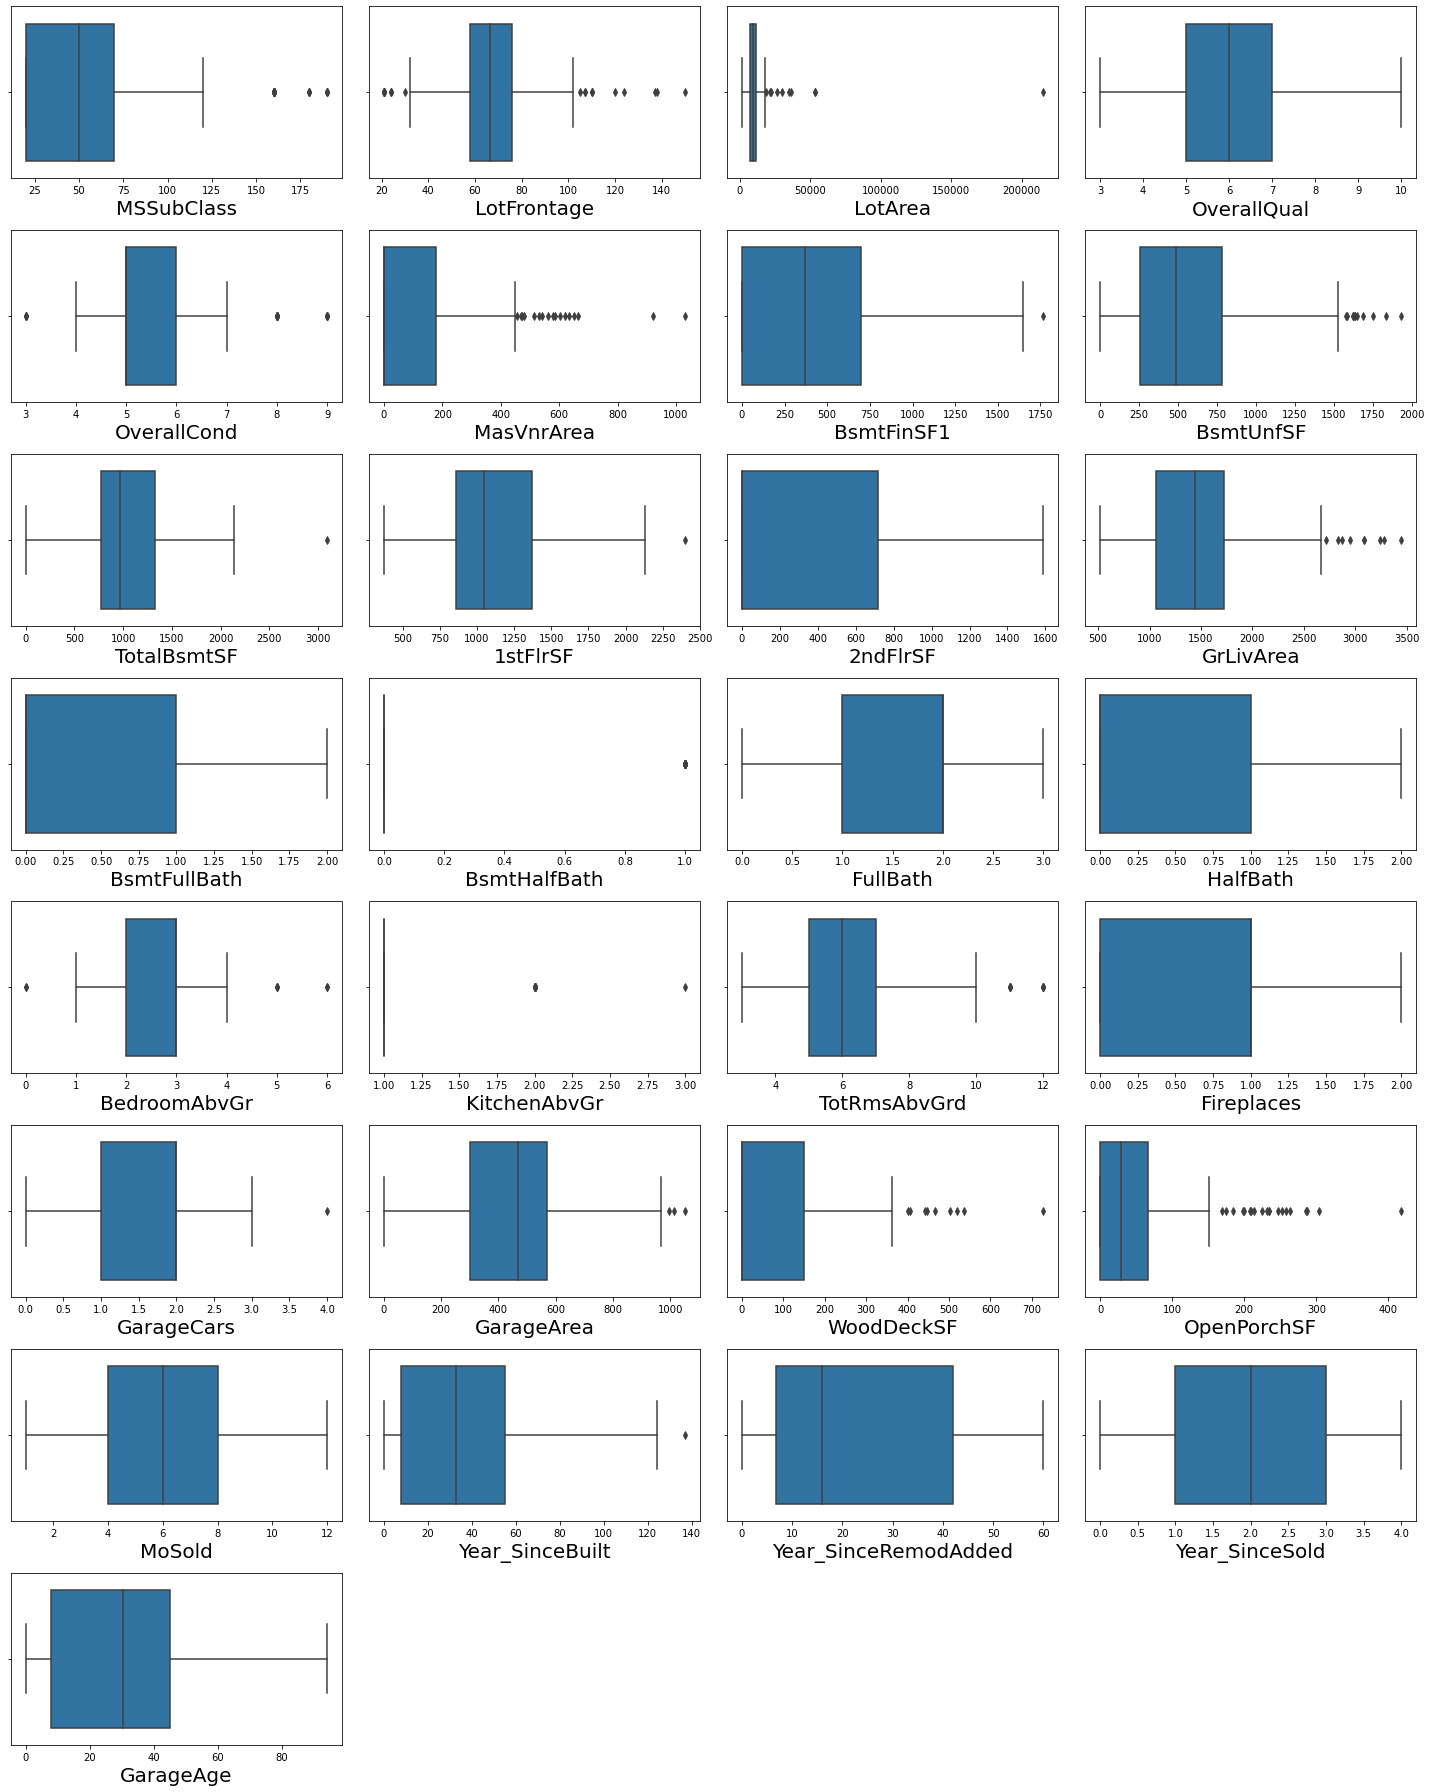

In [47]:
# Identifying the outliers using boxplot in test dataset

plt.figure(figsize=(20,25))
plotnumber=1
for column in num_columnsa:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(dfa[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Removing for outliers for ZSCORE method of train dataset:

In [48]:
# let's create a list of columns which is having outliers

feature = df[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','GarageAge']]

Here we have created a list of train dataset which is having outliers.

In [49]:
# importing zscore library:

from scipy.stats import zscore
z=np.abs(zscore(feature))
df_new=df[(z<3).all(axis=1)]
df_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
5    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
5            7            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None         0.0        TA        TA     CBlock       Gd       TA   
1       None         0.0        Gd        Gd      PConc       TA       Gd   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3    BrkFace       480.0        TA        TA     CBlock       Gd       TA   
5       None         0.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No          ALQ         120          Unf        958         1078   
1           Gd          ALQ         351          Rec       1043         2217   
2           Av          GLQ         862          Unf        255         1117   
3           No          BLQ         705          Unf       1139         1844   
5           Av          Unf           0          Unf        879          879   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        TA          Y      SBrkr       958         0        958   
1    GasA        Ex          Y      SBrkr      2217         0       2217   
2    GasA        Ex          Y      SBrkr      1127       886       2013   
3    GasA        Ex          Y      SBrkr      1844         0       1844   
5    GasA        Ex          Y      SBrkr       879       984       1863   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
5             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ           1          TA     Attchd   
5          Gd             9        Typ           1          Gd    BuiltIn   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         440         TA         TA          Y   
1          Unf           2         621         TA         TA          Y   
2          Unf           2         455      

In [50]:
# checking the outliers of new dataset

df_new.shape

(929, 68)

In [51]:
#Checking shape of old train dataset

df.shape

(1168, 68)

In [52]:
#Checking dataloss in zscore method of train dataset

Dataloss = (((1168-929)/1168)*100)
Dataloss

20.46232876712329

here we can see the Dataloss , but i would like to try another IQR method:

# IQR method:

In [53]:
# 1st quantile
Q1=feature.quantile(0.25)

# 3rd quantile
Q3=feature.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [54]:
#Checking shape of new train dataset

df_1.shape

(693, 68)

In [55]:
#Checking shape of new train dataset

df.shape

(1168, 68)

In [56]:
#Checking dataloss in IQR method of train dataset
Dataloss = (((1168-693)/1168)*100)
Dataloss

40.667808219178085

here we can see the daaloss is fine with IQR method

# Removing outliers from the test dataset with Zscore method:

In [57]:
# creating a list for test dataset

featurea = dfa[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','GarageAge']]

In [58]:
# importing Z score library and removing outliers with zscore method

from scipy.stats import zscore
z=np.abs(zscore(featurea))
dfa_new=dfa[(z<3).all(axis=1)]
dfa_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Corner       Gtl      StoneBr       Norm       Norm     1Fam     1Story   
1   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     1Story   
3    Inside       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            9            5       Hip  CompShg     VinylSd     VinylSd   
1            8            5     Gable  CompShg     HdBoard     HdBoard   
2            8            5       Hip  CompShg     VinylSd     VinylSd   
3            7            7     Gable  CompShg     MetalSd     MetalSd   
4            6            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0      Stone       200.0        Gd        TA      PConc       Ex       TA   
1       None         0.0        Gd        TA     CBlock       Gd       TA   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     CBlock       TA       TA   
4      Stone        74.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           Gd          GLQ        1249          Unf        673         1922   
1           Av          GLQ        1036          Unf        184         1220   
2           Av          Unf           0          Unf       1753         1753   
3           No          Rec         275          Unf        429          704   
4           Mn          Unf           0          Unf        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr      1922         0       1922   
1    GasA        Gd          Y      SBrkr      1360         0       1360   
2    GasA        Ex          Y      SBrkr      1788         0       1788   
3    GasA        Ex          Y      SBrkr       860       704       1564   
4    GasA        Ex          Y      SBrkr       894      1039       1933   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         0             3             1   
1             1             0         1         0             1             1   
2             0             0         2         0             3             1   
3             0             0         1         1             3             1   
4             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           1          Gd     Attchd   
1          Gd             4        Typ           1          Ex     Attchd   
2          Ex             7        Typ           1          TA     Attchd   
3          Fa             7        Typ           1          Gd     Attchd   
4          Gd             9        Typ           1          Gd    BuiltIn   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          Fin           3         676         TA         TA          Y   
1          RFn           2         565         TA         TA          Y   
2          RFn           2         522      

In [59]:
# checking thr shape of new test dataset 

dfa_new.shape

(233, 67)

In [60]:
# chekling the shape of old test dataset

dfa.shape

(292, 67)

In [61]:
# checking dataloss aftter the removing outliers

Dataloss = (((292-233)/292)*100)
Dataloss

20.205479452054796

here we have get a beautifulll percentage after removing , so i am not looking for anything more

# Checking for Skewness:

In [62]:
# checking for the skewness in the train dataset

df.skew()

MSSubClass               1.422019
LotFrontage              2.710383
LotArea                 10.659285
OverallQual              0.175082
OverallCond              0.580714
MasVnrArea               2.834658
BsmtFinSF1               1.871606
BsmtUnfSF                0.909057
TotalBsmtSF              1.744591
1stFlrSF                 1.513707
2ndFlrSF                 0.823479
GrLivArea                1.449952
BsmtFullBath             0.627106
BsmtHalfBath             4.264403
FullBath                 0.057809
HalfBath                 0.656492
BedroomAbvGr             0.243855
KitchenAbvGr             4.365259
TotRmsAbvGrd             0.644657
Fireplaces               0.671966
GarageCars              -0.358556
GarageArea               0.189665
WoodDeckSF               1.504929
OpenPorchSF              2.410840
MoSold                   0.220979
SalePrice                1.953878
Year_SinceBuilt          0.579204
Year_SinceRemodAdded     0.495864
Year_SinceSold          -0.115765
GarageAge     

MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,SalePrice,GarageAge
these all the columns is having skewness

In [63]:
# checking for the test dataset skewness

dfa.skew()

MSSubClass               1.358597
LotFrontage              0.466813
LotArea                 12.781805
OverallQual              0.397312
OverallCond              1.209714
MasVnrArea               1.976804
BsmtFinSF1               0.739790
BsmtUnfSF                0.960708
TotalBsmtSF              0.519257
1stFlrSF                 0.692047
2ndFlrSF                 0.765511
GrLivArea                1.010586
BsmtFullBath             0.463685
BsmtHalfBath             3.544994
FullBath                -0.049800
HalfBath                 0.758892
BedroomAbvGr             0.075315
KitchenAbvGr             4.849432
TotRmsAbvGrd             0.805535
Fireplaces               0.540164
GarageCars              -0.280324
GarageArea               0.133547
WoodDeckSF               1.708221
OpenPorchSF              2.185030
MoSold                   0.186504
Year_SinceBuilt          0.755233
Year_SinceRemodAdded     0.535600
Year_SinceSold          -0.018412
GarageAge                0.683042
dtype: float64

MSSubClass,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtHalfBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,WoodDeckSF,OpenPorchSF,Year_SinceBuilt,GarageAge
these are all columns which is having skewness.

In [64]:
# creating a list for removing skewness

fea = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','HalfBath','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','SalePrice','GarageAge']

In [65]:
# removing skewness with the yeo johnson 

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [66]:
df[fea] = scaler.fit_transform(df[fea].values)

In [67]:
#Checking skewness again in train dataset

df[fea].skew()

MSSubClass      0.064007
LotFrontage     0.161368
LotArea         0.032509
MasVnrArea      0.416370
BsmtFinSF1     -0.404528
BsmtUnfSF      -0.284390
TotalBsmtSF     0.286779
1stFlrSF       -0.002391
2ndFlrSF        0.280208
GrLivArea      -0.000054
BsmtFullBath    0.365488
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr   -2.370593
TotRmsAbvGrd    0.002332
Fireplaces      0.084950
WoodDeckSF      0.113026
OpenPorchSF    -0.002749
SalePrice      -0.006010
GarageAge      -0.137821
dtype: float64

skewness removed successfully

In [68]:
# creating a list for removing outliers

feaa = ['MSSubClass','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','TotRmsAbvGrd','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','GarageAge']

In [69]:
# importing required libraries with yeo johnson

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [70]:
dfa[feaa] = scaler.fit_transform(dfa[feaa].values)

In [71]:
# checking skewness again after removing it

dfa[feaa].skew()

MSSubClass         0.089921
LotArea            0.003111
MasVnrArea         0.363253
BsmtFinSF1        -0.441605
BsmtUnfSF         -0.232099
1stFlrSF          -0.000548
2ndFlrSF           0.284246
GrLivArea         -0.000307
BsmtHalfBath       3.544994
HalfBath           0.621093
KitchenAbvGr       4.253608
TotRmsAbvGrd      -0.000469
WoodDeckSF         0.210102
OpenPorchSF       -0.058951
Year_SinceBuilt   -0.147007
GarageAge         -0.130201
dtype: float64

removed it successfully , but i can see here there is a columns which has skewness after the removing it


In [72]:
#Dropping unnecessary column

dfa = dfa.drop(["BsmtHalfBath"],axis=1)
df = df.drop(["BsmtHalfBath"],axis=1)

i have dropped that unuseless columns

# Checking correlation :

In [73]:
#Correlation of train dataset

cor=df.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass              1.000000    -0.332102 -0.331206     0.122241   
LotFrontage            -0.332102     1.000000  0.618452     0.212155   
LotArea                -0.331206     0.618452  1.000000     0.168766   
OverallQual             0.122241     0.212155  0.168766     1.000000   
OverallCond            -0.033927    -0.033737  0.016675    -0.083167   
MasVnrArea              0.005144     0.132816  0.063681     0.395978   
BsmtFinSF1             -0.100162     0.100598  0.128215     0.073906   
BsmtUnfSF              -0.117277     0.117288  0.051529     0.296793   
TotalBsmtSF            -0.264392     0.316901  0.322030     0.524804   
1stFlrSF               -0.307929     0.411351  0.459590     0.435470   
2ndFlrSF                0.558522    -0.044001 -0.007082     0.210693   
GrLivArea               0.228230     0.327219  0.382466     0.620781   
BsmtFullBath           -0.063160     0.078665  0.119215     0.109432   
FullBath                0.197635     0.166887  0.172153     0.548824   
HalfBath                0.295003     0.029532  0.029895     0.311855   
BedroomAbvGr            0.091836     0.265385  0.267795     0.099639   
KitchenAbvGr            0.202185     0.031161  0.007304    -0.153046   
TotRmsAbvGrd            0.171182     0.333446  0.356074     0.436025   
Fireplaces              0.029620     0.225256  0.315472     0.420408   
GarageCars              0.003468     0.270081  0.254062     0.596322   
GarageArea             -0.072519     0.325496  0.313890     0.566782   
WoodDeckSF              0.038929     0.061735  0.124392     0.266060   
OpenPorchSF             0.063174     0.156065  0.140321     0.465324   
MoSold                  0.010865     0.029385  0.025576     0.090638   
SalePrice               0.015462     0.337677  0.380353     0.817389   
Year_SinceBuilt         0.014479    -0.098478 -0.007245    -0.575800   
Year_SinceRemodAdded   -0.052458    -0.073908 -0.021134    -0.555945   
Year_SinceSold          0.042020     0.005670  0.039367     0.048759   
GarageAge              -0.056499    -0.053822  0.035242    -0.586509   

                      OverallCond  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
MSSubClass              -0.033927    0.005144   -0.100162  -0.117277   
LotFrontage             -0.033737    0.132816    0.100598   0.117288   
LotArea                  0.016675    0.063681    0.128215   0.051529   
OverallQual             -0.083167    0.395978    0.073906   0.296793   
OverallCond              1.000000   -0.163111    0.044391  -0.113454   
MasVnrArea              -0.163111    1.000000    0.198449   0.083814   
BsmtFinSF1               0.044391    0.198449    1.000000  -0.531453   
BsmtUnfSF               -0.113454    0.083814   -0.531453   1.000000   
TotalBsmtSF             -0.146541    0.327510    0.331098   0.423647   
1stFlrSF                -0.126058    0.316860    0.229115   0.242214   
2ndFlrSF                 0.065349   -0.023978   -0.206206   0.034604   
GrLivArea               -0.084531    0.290288    0.009489   0.261842   
BsmtFullBath            -0.036942    0.125596    0.629930  -0.408525   
FullBath                -0.171931    0.269085   -0.060379   0.236214   
HalfBath                -0.050128    0.142567   -0.000416   0.010375   
BedroomAbvGr             0.028393    0.079742   -0.110916   0.162850   
KitchenAbvGr            -0.058978   -0.069674   -0.110382  -0.010820   
TotRmsAbvGrd            -0.041697    0.229773   -0.081475   0.246366   
Fireplaces              -0.028436    0.226713    0.143797   0.088115   
GarageCars              -0.161996    0.361820    0.089122   0.194042   
GarageArea              -0.126021    0.346836    0.147933   0.160854   
WoodDeckSF              -0.027213    0.153998    0.094137  -0.000757   
OpenPorchSF             -0.105658    0.219306    0.023073   0.206378   
MoSold                   0.005519    0.051719    0.002986   0.037605   
SalePrice               -0.015500    0.393501    0.233799   0

Here we can see the correlation of train dataset , but for the better visualization we will use heatmap

In [74]:
# chekcking the corrlation of test dataset

cor = dfa.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass              1.000000    -0.367224 -0.417596    -0.069846   
LotFrontage            -0.367224     1.000000  0.623700     0.254760   
LotArea                -0.417596     0.623700  1.000000     0.217092   
OverallQual            -0.069846     0.254760  0.217092     1.000000   
OverallCond            -0.034310    -0.096571 -0.099886    -0.131891   
MasVnrArea             -0.000399     0.108944  0.057879     0.450665   
BsmtFinSF1             -0.149131     0.097369  0.136856     0.161217   
BsmtUnfSF              -0.149655     0.157696  0.113707     0.309174   
TotalBsmtSF            -0.380419     0.398795  0.408620     0.578468   
1stFlrSF               -0.395148     0.458767  0.495823     0.526583   
2ndFlrSF                0.594391    -0.080395 -0.052562     0.105142   
GrLivArea               0.176449     0.348015  0.397836     0.589578   
BsmtFullBath           -0.063360     0.085464  0.148346     0.150559   
FullBath                0.148260     0.227718  0.210105     0.558577   
HalfBath                0.344635     0.031989  0.066096     0.193360   
BedroomAbvGr            0.051146     0.227534  0.307383     0.108994   
KitchenAbvGr            0.248419     0.014508 -0.006738    -0.202496   
TotRmsAbvGrd            0.099977     0.330815  0.399155     0.429080   
Fireplaces             -0.014636     0.255314  0.317227     0.425392   
GarageCars             -0.048854     0.306181  0.335243     0.618763   
GarageArea             -0.088681     0.317132  0.350725     0.542729   
WoodDeckSF              0.066162     0.020964  0.098388     0.350829   
OpenPorchSF            -0.084825     0.054913  0.134890     0.357631   
MoSold                  0.027777    -0.045333 -0.045307    -0.008545   
Year_SinceBuilt         0.015975    -0.152912 -0.079597    -0.653168   
Year_SinceRemodAdded    0.026990    -0.056610 -0.057241    -0.528983   
Year_SinceSold         -0.023869    -0.059745 -0.017708    -0.061736   
GarageAge              -0.039131    -0.125460 -0.052810    -0.629779   

                      OverallCond  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
MSSubClass              -0.034310   -0.000399   -0.149131  -0.149655   
LotFrontage             -0.096571    0.108944    0.097369   0.157696   
LotArea                 -0.099886    0.057879    0.136856   0.113707   
OverallQual             -0.131891    0.450665    0.161217   0.309174   
OverallCond              1.000000   -0.152434   -0.031028  -0.042613   
MasVnrArea              -0.152434    1.000000    0.240185   0.176680   
BsmtFinSF1              -0.031028    0.240185    1.000000  -0.482958   
BsmtUnfSF               -0.042613    0.176680   -0.482958   1.000000   
TotalBsmtSF             -0.213289    0.403660    0.398875   0.417432   
1stFlrSF                -0.184117    0.365200    0.295609   0.311109   
2ndFlrSF                 0.027196   -0.083975   -0.245061   0.019987   
GrLivArea               -0.182304    0.292892    0.055395   0.288610   
BsmtFullBath            -0.121640    0.145956    0.636434  -0.361966   
FullBath                -0.288175    0.318870   -0.057876   0.350684   
HalfBath                -0.100458    0.131845   -0.022417   0.014040   
BedroomAbvGr            -0.061694    0.091343   -0.050892   0.234394   
KitchenAbvGr            -0.134464   -0.027438   -0.163388   0.028013   
TotRmsAbvGrd            -0.140176    0.209758   -0.041152   0.333891   
Fireplaces              -0.071834    0.243390    0.181277   0.125216   
GarageCars              -0.291486    0.471854    0.170602   0.147088   
GarageArea              -0.269860    0.416189    0.197645   0.102591   
WoodDeckSF              -0.100253    0.181011    0.112738   0.039053   
OpenPorchSF             -0.076447    0.178582    0.074647   0.125159   
MoSold                  -0.043722   -0.089785   -0.132982   0.009798   
Year_SinceBuilt          0.376525   -0.412076   -0.165333  -0.180441   
Year_SinceRemodAdded    -0.045747   -0.215254   -0.060113  -0

Here we can see the correlation of the test dataset , but for the better visualization we will use the heatmap.

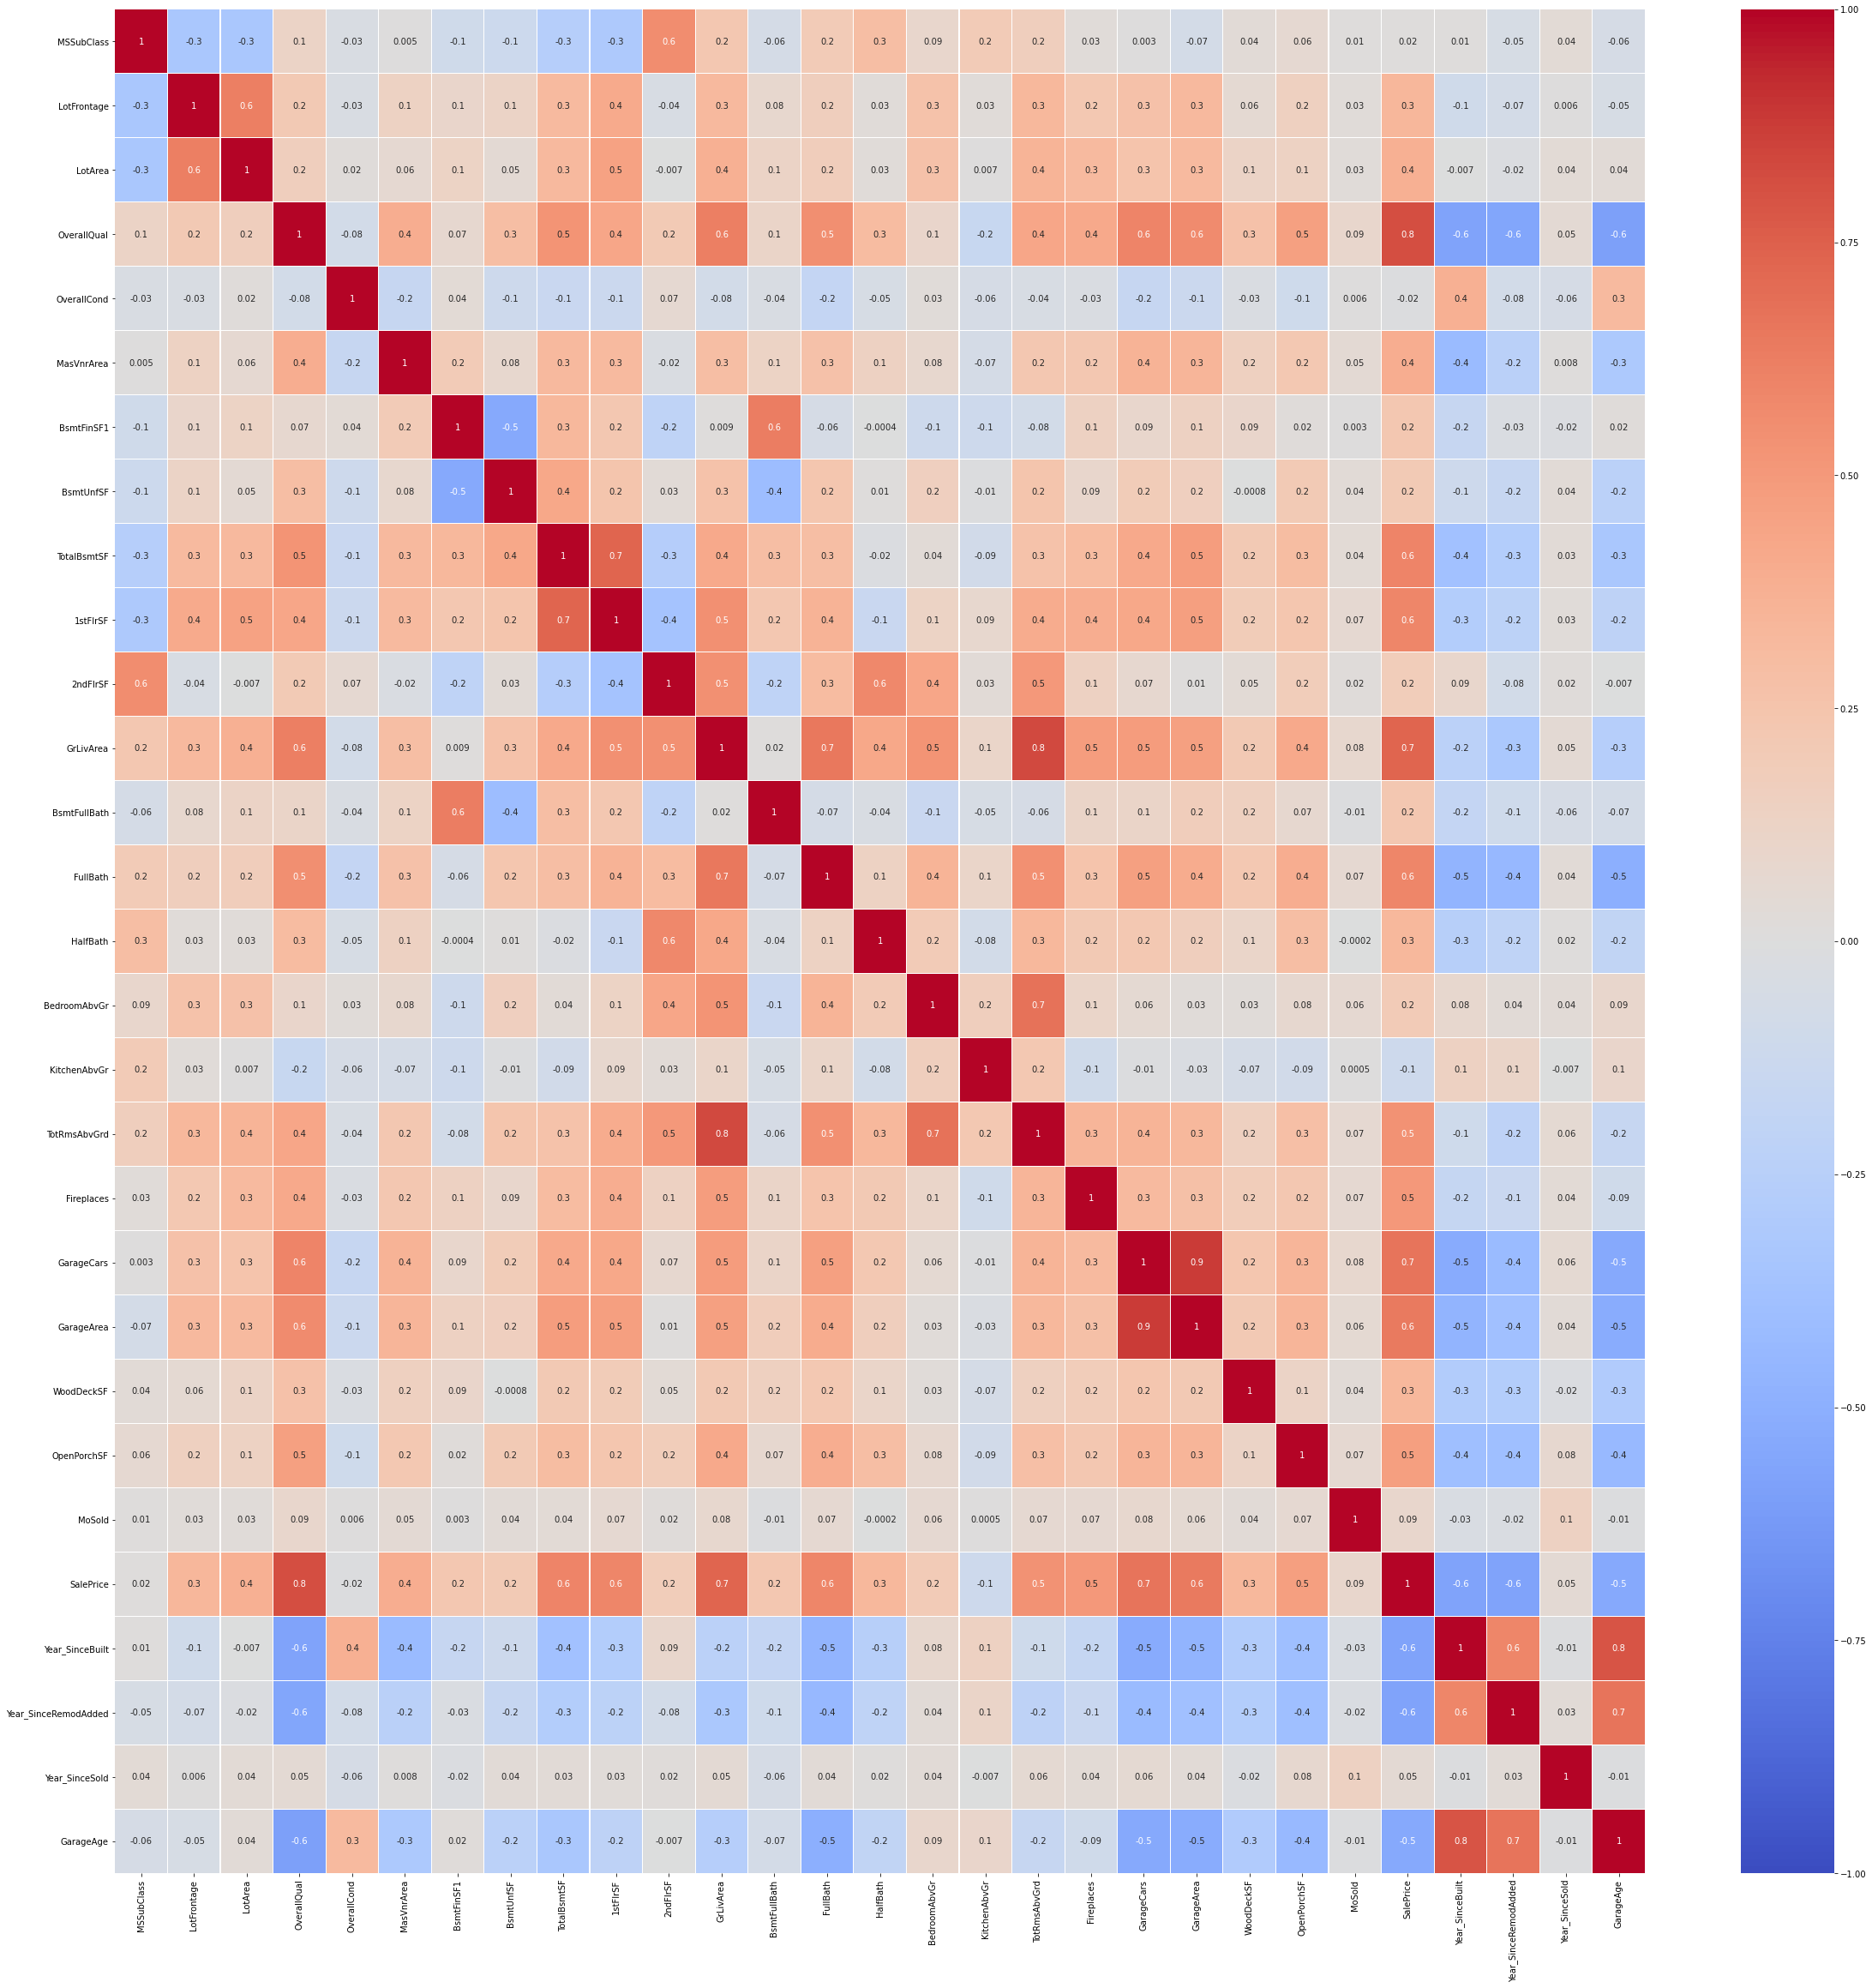

In [75]:
# Visualizing the correlation matrix by plotting heat map for train dataset.
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True,annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

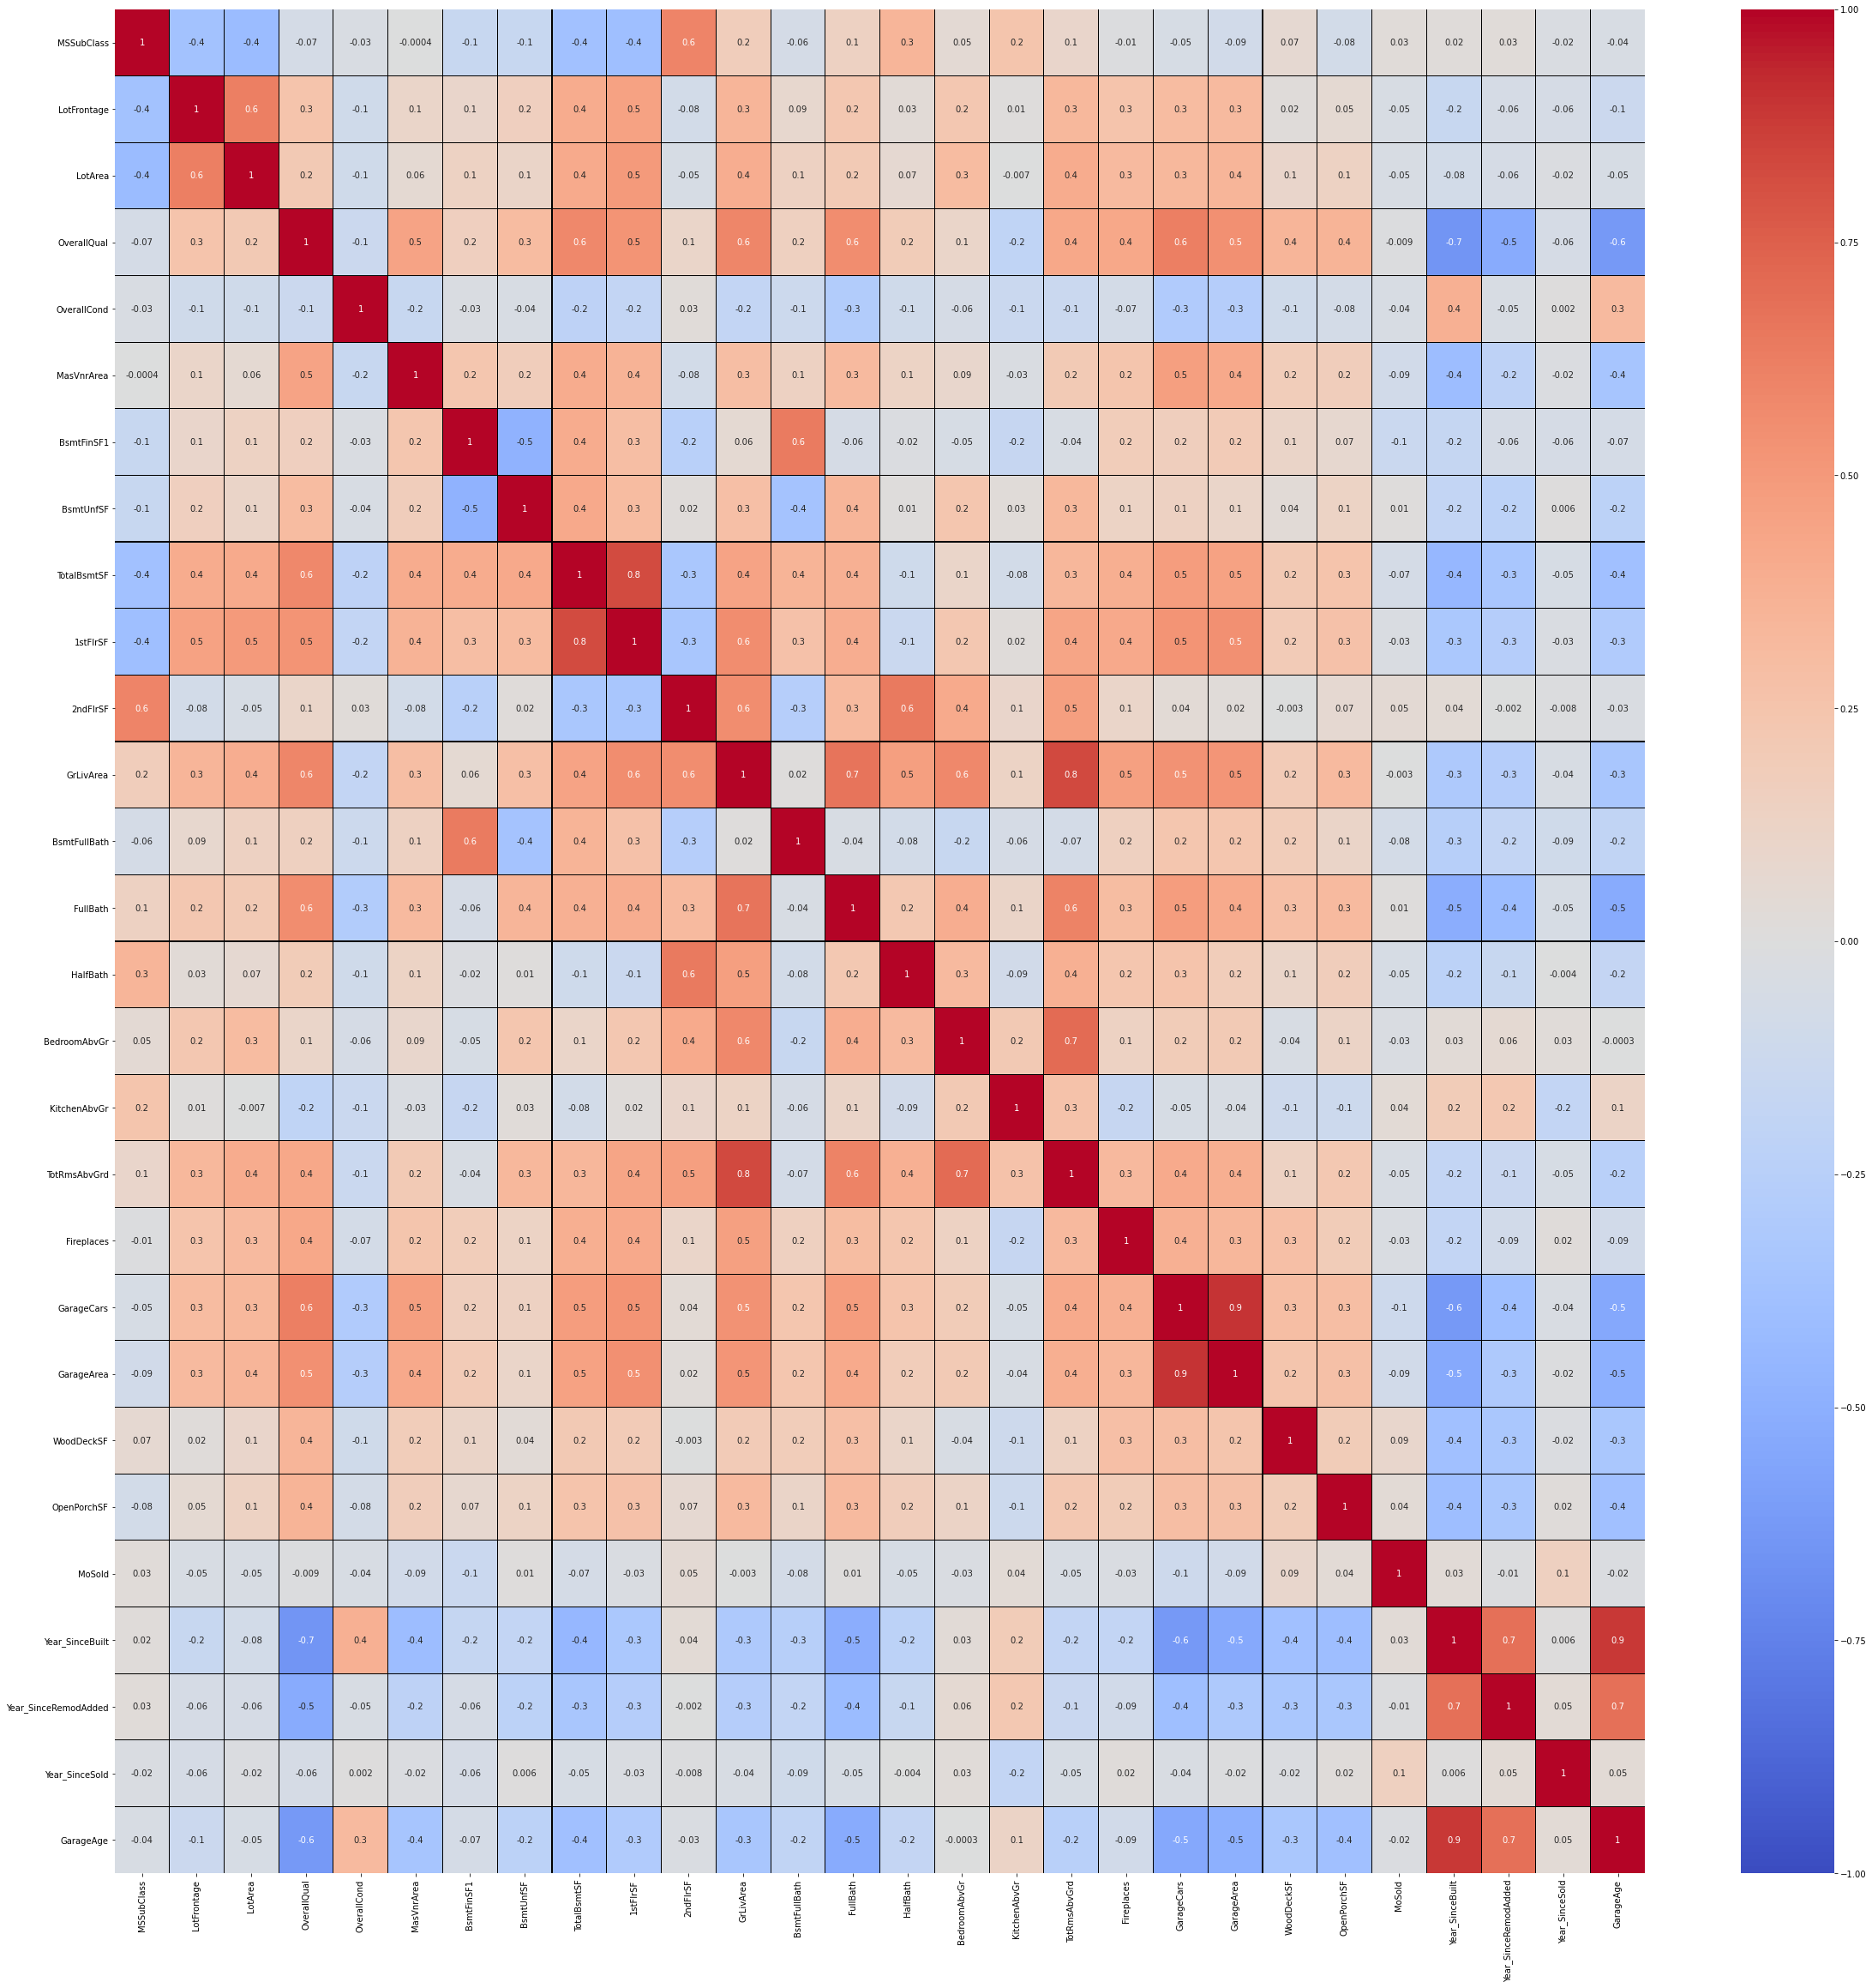

In [76]:
# Visualizing the correlation matrix by plotting heat map for test dataset.
plt.figure(figsize=(40,40))
sns.heatmap(dfa.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

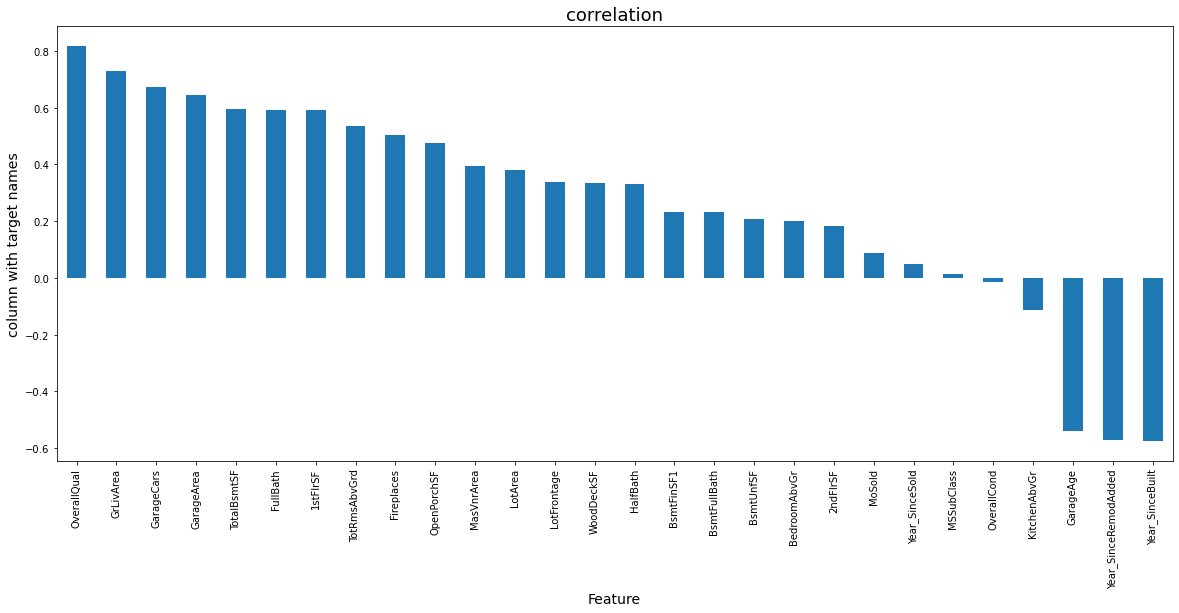

In [77]:
plt.figure(figsize=(20,8))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Ordinal Encoding:

In [121]:
#Replacing ratings with suitable numbers in required columns in train dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}) 

In [122]:
#Replacing ratings with suitable numbers in required columns in test dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    dfa[i] = dfa[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [123]:
#Ordinal encoding for train dataset

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [124]:
#Ordinal encoding for test dataset

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in dfa.columns:
    if dfa[i].dtypes=='object':
        dfa[i]=OE.fit_transform(dfa[i].values.reshape(-1,1))

In [125]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [126]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [127]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.370435 -0.021646     0.093658 -1.213954  0.058621 -1.373107   
1   -1.167999 -0.021646     1.117135  1.100521  0.058621 -1.373107   
2    0.490047 -0.021646     0.998803  0.158048  0.058621 -1.373107   
3   -1.167999 -0.021646     1.495566  0.496002  0.058621 -1.373107   
4   -1.167999 -0.021646     0.093658  1.196626  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0  2.985495   -0.549930    -0.075169    -0.530217  -0.483544 -0.134573   
1 -0.403288   -0.549930     1.364138     0.359572  -1.685203  6.090408   
2 -0.403288    1.030838     0.644484    -0.530217  -0.483544 -0.134573   
3 -0.403288   -0.549930    -0.075169     0.359572   1.919773 -0.134573   
4 -0.403288   -0.549930    -0.075169     1.249361  -0.483544 -0.134573   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0    -0.212927    -0.104890    0.395209   -0.822734  -0.700004  -0.223988   
1     1.079014     1.050880    0.395209   -0.822734   1.032209   2.589114   
2    -0.535912    -0.682775    0.395209   -0.822734   1.032209  -0.223988   
3    -0.212927    -0.104890   -1.241686    1.382984  -0.700004  -0.223988   
4    -1.504868    -1.549602    2.032104    1.138552   1.032209  -0.223988   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0   -0.557836  0.647378 -0.037507      0.635539     -1.523529   -0.112649   
1    0.852451 -0.832343  3.332324     -1.113129     -1.523529    0.394677   
2    0.852451  0.647378 -0.037507     -1.987463     -0.434828    0.925416   
3   -0.557836  0.647378 -0.037507      0.635539     -0.979178    0.797133   
4   -0.557836  0.647378 -0.037507      0.635539     -1.523529    1.176115   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0      0.310141   0.903777     0.099335 -0.11909  -1.178317    0.267506   
1     -0.771186   1.027313     2.374300 -0.11909   0.903792    0.267506   
2      0.310141  -0.504500     0.185571 -0.11909   0.903792    0.267506   
3      0.310141   1.160517     1.674462 -0.11909   0.903792    0.267506   
4      0.310141  -0.226633     1.200095 -0.11909  -0.137262    0.267506   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0    0.299036 -0.458345 -0.871745  -1.236502     -0.837006  0.793082   
1    0.299036  2.122554 -0.871745   1.295050      1.176812  0.793082   
2    0.299036  0.058641  1.176207   1.003880      1.176812  0.793082   
3    0.299036  1.574554 -0.871745   0.739356     -0.837006  0.793082   
4    0.299036  1.149105 -0.871745   0.314931     -0.837006  0.793082   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.782707     -1.082679     -0.169259    -0.788838     -0.984125   
1 -0.782707      1.365664     -0.169259     0.716657      0.943901   
2  1.268421      0.141492     -0.169259    -0.788838      0.943901   
3 -0.782707      0.141492     -0.169259    -0.788838      0.375729   
4 -0.782707      0.141492     -0.169259     0.716657      0.943901   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0    0.261146    0.777879    -1.163409   -0.693653     -0.288773     0.29985   
1    0.261146    0.777879    -1.163409   -0.693653      0.946709     0.29985   
2    0.261146    0.777879    -1.163409   -0.693653      0.946709     0.29985   
3    0.261146    0.777879    -1.163409   -0.693653     -0.288773     0.29985   
4    0.261146    0.777879    -1.16340

In [128]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dfa), columns=dfa.columns)

In [129]:
X_1.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -1.149768 -0.287006     0.981605  0.842656  0.083045 -1.402669   
1    1.337666 -0.287006     0.000000 -0.739104  0.083045 -1.402669   
2   -1.149768 -0.287006     0.000000  0.524304  0.083045  0.745474   
3    0.705404 -0.287006     0.429998  0.548484  0.083045  0.745474   
4    0.507343 -0.287006     0.981605  0.897263  0.083045 -1.402669   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0    -2.566101  -2.001106  -0.226274      1.554460   -0.028763   -0.058621   
1     0.299297  -1.351136  -0.226274      1.554460   -0.028763   -0.058621   
2     0.299297   0.598774  -0.226274     -1.281387   -0.028763   -0.058621   
3    -3.998799   0.598774  -0.226274     -1.114572   -0.028763   -0.058621   
4     0.299297  -1.351136  -0.226274      1.387645   -1.228602   -0.058621   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0 -0.444642   -0.518671     2.157766    -0.464603   1.846195 -0.078757   
1  2.722077   -0.518671     1.419117    -0.464603  -0.523427 -0.078757   
2 -0.444642   -0.518671     1.419117    -0.464603   1.846195 -0.078757   
3 -0.444642    1.011146     0.680468     1.419621  -0.523427 -0.078757   
4 -0.444642    1.011146    -0.058181    -0.464603  -0.523427 -0.078757   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     0.694397     0.733065    1.952161    1.182923   1.137790  -0.299447   
1    -1.046066    -1.248926    0.355435   -0.846534   1.137790  -0.299447   
2     0.694397     0.733065    0.355435   -0.846534   1.137790  -0.299447   
3    -0.610950    -0.588262    0.355435   -0.846534  -0.648418  -0.299447   
4     0.694397     0.733065    1.952161    0.952580   1.137790  -0.299447   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0    0.776109  2.077301 -0.045376     -1.192678     -0.377559    1.205140   
1   -0.518884  0.619196 -0.045376     -2.090260     -0.377559    1.064798   
2    0.776109  0.619196 -0.045376     -2.090260      1.284459   -1.375716   
3   -0.518884 -0.838910 -0.045376      0.602487      0.730453    0.235689   
4    0.776109  0.619196 -0.045376     -0.295096      1.284459   -1.375716   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  \
0      0.296045   0.455087     2.074477 -0.141879   0.842032    0.248633   
1      0.296045  -0.841820     0.418166 -0.141879  -0.208709    0.248633   
2      0.296045   2.127575     1.675735 -0.141879   0.842032    0.248633   
3      0.296045  -0.093395    -0.799293 -0.141879   0.842032    0.248633   
4      0.296045   0.870427    -0.351004 -0.141879   0.842032    0.248633   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0    0.312609  1.814725 -0.870294   0.943726      1.132656  0.776457   
1    0.312609  0.726749 -0.870294  -0.077517      1.132656 -1.051974   
2    0.312609  1.586900 -0.870294   0.729670     -0.836008  0.776457   
3    0.312609 -0.705442  1.137231   0.334155     -0.836008 -1.051974   
4    0.312609 -0.584696  1.211129   0.960645     -0.836008  0.776457   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.738058      0.254952      -0.22441     0.816613      0.961793   
1 -0.738058     -2.226584      -0.22441     0.816613     -1.618327   
2 -0.738058      0.254952      -0.22441     2.335408      0.447622   
3  1.349285      0.254952      -0.22441    -2.220978      0.447622   
4  1.349285      1.495721      -0.22441     0.816613      1.420534   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0     0.22482    0.651586     0.487877   -0.659455     -1.474589    1.687009   
1     0.22482    0.651586     2.268630   -0.659455     -0.254816    0.359228   
2     0.22482    0.651586    -1.292875   -0.659455     -0.254816    0.359228   
3     0.22482    0.651586     0.487877   -0.659455      0.964957   -0.968552   
4     0.22482    0.651586     0

Train_dataset After scalling:

# Model Accuracy:

# Finding Best Accuracy and Random State:

In [96]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.898223861501165  on Random_state  72


i got the best accuracy which is near about 90 %

In [98]:
# creating train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Regression Algorithm:

In [100]:
#importing necessary libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# Random Forest Regressor:

In [101]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 89.73507839299069
mean_squared_error: 0.10606333312176862
mean_absolute_error: 0.23502683140984207
root_mean_squared_error: 0.32567366046668345

Cross validation score : 86.07950559484392

R2_Score - Cross Validation Score : 3.655572798146764


# ExtraTree Regressor:

In [102]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(ETR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 87.9999434074294
mean_squared_error: 0.12399178957088135
mean_absolute_error: 0.2402966750679968
root_mean_squared_error: 0.3521246790142397

Cross validation score : 86.21666033064021

R2_Score - Cross Validation Score : 1.7832830767891892


# Gradient Boosting Regressor:

In [103]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 90.32785090255855
mean_squared_error: 0.09993845165118907
mean_absolute_error: 0.22140643193801374
root_mean_squared_error: 0.31613043455382317

Cross validation score : 87.33528440372697

R2_Score - Cross Validation Score : 2.9925664988315788


# Decision Tree Regressor:

In [104]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 74.97021424211961
mean_squared_error: 0.25862277438064424
mean_absolute_error: 0.3698067457785984
root_mean_squared_error: 0.5085496773970506

Cross validation score : 71.47489121028462

R2_Score - Cross Validation Score : 3.4953230318349853


i choose Gradient Boosting Regressor as the best model because it 90 % accuracy

# Hyper tuning model:

In [105]:
#importing necessary libraries

from sklearn.model_selection import GridSearchCV

In [109]:
parameter = {'criterion':['friedman_mse'],
             'max_depth': [3],
             'n_estimators':[100],
             'max_features': ['None','auto','sqrt']}

In [110]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [111]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [3],
                         'max_features': ['None', 'auto', 'sqrt'],
                         'n_estimators': [100]})

In [112]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 100}

best parameter for GBR

In [113]:
Best_mod=ExtraTreesRegressor(criterion='mae',max_features='sqrt',min_samples_split=2,n_estimators=100,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 87.90038234894895
mean_squared_error: 0.12502051420374724
mean_absolute_error: 0.247144074713773
RMSE value: 0.35358240086823783


# Saving the model:

got 87.90 % score which is good

In [114]:
# Saving the model using .pkl

import joblib
joblib.dump(Best_mod,"House_Price.pkl")

['House_Price.pkl']

In [116]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0         1         2         3         4         5    \
Predicted -0.476806 -0.721486 -1.421620  0.021063 -0.432991  0.361787   
Actual    -0.445258 -1.117868 -3.013425 -0.235088 -0.752316  0.377026   

                6         7         8         9         10        11   \
Predicted -0.716418 -0.796579 -0.704576 -0.055932 -0.597266 -0.024862   
Actual    -0.857445 -0.846727 -0.592990 -0.121339 -0.050944 -0.443445   

                12        13        14        15        16        17   \
Predicted -0.061124  1.447364 -0.818502 -0.585161  0.042255  0.135080   
Actual     0.120142  1.162699 -0.535828 -1.058857  0.127311  0.539408   

                18        19        20        21        22        23   \
Predicted -0.544430  0.604081 -1.089880 -1.480372  0.424473 -0.463392   
Actual    -0.268594  0.247398 -1.303899 -1.849361  0.246036 -0.500215   

                24        25        26        27        28        29   \
Predicted -0.345329  0.645792  0.253943 -0.746074  1.103192  0.163149   
Actual     0.045764  1.167331  0.127311 -0.210259  1.601420  0.477114   

                30        31        32        33        34        35   \
Predicted -0.037414  0.015219  0.151012 -0.586815  1.458594  0.178477   
Actual    -0.025638  0.120142  0.083969 -0.405220  1.715337 -0.060212   

                36        37        38        39        40        41   \
Predicted  1.563249 -0.309655  0.120655 -0.222937 -0.232524 -0.071464   
Actual     1.332632 -0.185682 -0.145268 -0.354445 -0.105517 -0.461643   

                42        43        44        45        46        47   \
Predicted  1.392408 -0.452738  0.573433 -0.393733  1.369044  1.564212   
Actual     1.401316 -0.602648  0.558621 -0.255975  1.800500  1.582101   

                48        49        50        51        52        53   \
Predicted -0.102338 -1.029963  0.560646  1.854693 -0.855834 -0.455626   
Actual     0.686683 -1.724137  0.454734  2.075213 -0.319739  0.197858   

                54        55        56        57        58        59   \
Predicted -0.338200 -0.523119  0.926636 -0.668272 -0.034280  2.174166   
Actual    -0.153297 -0.651525  1.217696 -1.180780 -0.251783  3.230497   

                60        61        62        63        64        65   \
Predicted -0.806484  0.263116 -0.455336 -0.892279 -0.468750 -0.808814   
Actual    -0.944926 -0.107174 -0.319739 -0.911753 -0.944926 -1.303899   

                66        67       68        69        70        71   \
Predicted -0.779554  1.477804  0.18614 -1.025736  2.047644 -0.647058   
Actual    -0.825429  1.194936  0.51639 -1.070546  2.455020 -0.583369   

                72        73        74        75        76       77   \
Predicted -0.032060  0.616705  0.358402  1.450926 -0.716608 -0.63324   
Actual     0.120142  0.190895  0.576494  1.299725 -0.838185 -0.70140   

                78        79        80        81        82        83   \
Predicted  1.124473 -0.756758  0.110636  0.469375  1.112856  0.147033   
Actual     0.898038 -1.382429  0.516390  0.453485  0.802818  0.047096   

                84        85        86        87        88        89   \
Predicted -0.860391 -1.139679 -0.232732 -0.713169 -0.561321 -0.249426   
Actual    -0.868211 -1.094093 -0.113415 -0.783383 -0.105517 -0.185682   

                90        91        92        93        94        95   \
Predicted -0.622311  0.056841 -1.264652  0.679562 -0.261708 -0.736229   
Actual    -0.498453  0.416963 -1.634193  0.777641 -0.153297 -0.838185   

                96        97        98        99        100       101  \
Predicted  0.370735  0.033628 -0.448241 -0.847885 -1.474960 -0.904798   
Actual     0.230998  0.047244 -0.443445 -1.029874 -1.947594 -1.061190   

                102       103       104       105       106       107  \
Predicted -0.401667  0.767039  0.926417 -0.462753  1.666750  1.424204   
Actual    -0.407452  1.009457  0.856189  0.299938  2.019588  1.319331   

                108       109       110       111       112   

we can seee the almost values are same 

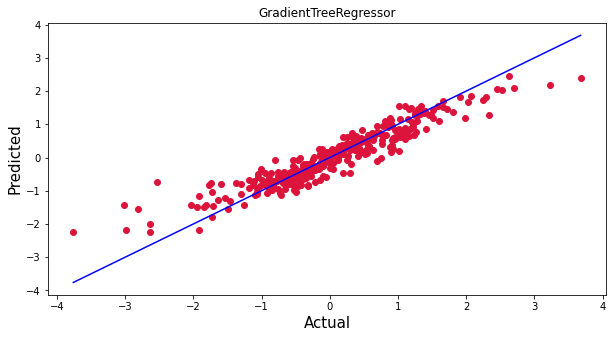

In [118]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("GradientTreeRegressor")
plt.show()

for a best view you can also see the above graph

# Thank you :)
    fliprobo